## Pergunta:

Com esse Jupyter eu busco responder à seguinte pergunta:
- Os indicadores usados no cálculo do IDH experienciam melhora entre os períodos de 1993-1994 e 1999-2000 para Laos, Cambodia, Vietnã e Mianmar?

## Hipótese:

Ao longo da década de 1990, foram observadas algumas ocorrências na Ásia:
- a ASEAN (Association of Southeast Asian Nations), um bloco que visava o crescimento econômico e o desenvolvimento cultural e social dos países-membros, se tornou um bloco de livre-comércio em 1992;
- em 1995, o Vietnã se junta à ASEAN
- em 1997, Laos e Mianmar se juntam à ASEAN
- em 1999, o Cambodia se junta à ASEAN, sendo o país-membro mais recente

Dado isso, acredita-se que a entrada no bloco por parte dos 4 países mencionados tenha contribuído em aspectos como crescimento econômico, educação e expectativa de vida, ou seja, entrar no bloco contribuiu para o desenvolvimento desses países

## Mecanismo:

Os objetivos fundamentais da ASEAN são a paz regional e o desenvolvimento econômico, social, cultural, tecnológico, científico e administrativo dos países-membros, então juntar-se ao bloco, ainda mais no período em que está se tornando um bloco de livre comércio, deve contribuir em alguma escala para o desenvolvimento de um país.

## Referência:

https://asean.org/asean/about-asean/

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

Agora, vou importar as planilhas de dados, trocar o índice das Databases para os nomes dos países e filtrar para obter os dados individuais de Cambodia, Laos, Vietnã e Mianmar, tirando anos em que não tenho dados para alguma das grandezas

In [2]:
gdpcapita = pd.read_excel("gdppercapita_us_inflation_adjusted.xlsx")
gdp = pd.read_excel("total_gdp_ppp_inflation_adjusted.xlsx")
expvida = pd.read_excel("life_expectancy_years.xlsx")
men_school = pd.read_excel("mean_years_in_school_men_15_to_24_years.xlsx")
women_school = pd.read_excel("mean_years_in_school_women_15_to_24_years.xlsx")
exports = pd.read_excel("exports_percent_of_gdp.xlsx")
imports = pd.read_excel("imports_percent_of_gdp.xlsx")
trade = pd.read_excel("merchandise_trade_percent_of_gdp.xlsx")

In [3]:
gdpcapita

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,445.0,525.0,553,569.0,630.0,634.0,630.0,620.0,618.0,618.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4870.0
2,Algeria,2470.0,2080.0,1630.0,2130.0,2200.0,2280.0,2110.0,2240.0,2410.0,...,4390.0,4390.0,4460,4500.0,4560.0,4600.0,4680.0,4760.0,4830.0,4830.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43900.0,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0,43000.0,43900.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3580.0,3540.0,3530,3540.0,3590.0,3710.0,3750.0,3730.0,3580.0,3480.0
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15300.0,13300.0,12200,11800.0,12100.0,11900.0,12400.0,12800.0,13300.0,13600.0
6,Argentina,5610.0,5820.0,5680.0,5290.0,5740.0,6250.0,6120.0,6230.0,6430.0,...,10100.0,9430.0,10300,10800.0,10600.0,10700.0,10300.0,10500.0,10200.0,10400.0
7,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3630.0,3140.0,3220,3370.0,3610.0,3710.0,3830.0,3940.0,3930.0,4220.0
8,Australia,19400.0,19500.0,19300.0,20100.0,21000.0,21900.0,21900.0,23000.0,23700.0,...,51800.0,51700.0,51900,52500.0,53600.0,54000.0,54500.0,55000.0,55700.0,55900.0
9,Austria,13000.0,13700.0,14000.0,14400.0,15200.0,15600.0,16400.0,16800.0,17400.0,...,48100.0,46100.0,46900,48100.0,48200.0,47900.0,47900.0,47900.0,48100.0,49100.0


In [4]:
gdp

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,...,28900000000,32400000000,3.390000e+10,3.850000e+10,3.950000e+10,4.750000e+10,5.130000e+10,5.490000e+10,6.300000e+10,6.580000e+10
1,Albania,3.260000e+08,3.270000e+08,3.280000e+08,3.300000e+08,3.310000e+08,3.320000e+08,3.340000e+08,3.350000e+08,3.370000e+08,...,21100000000,22300000000,2.350000e+10,2.490000e+10,2.670000e+10,2.760000e+10,2.850000e+10,2.930000e+10,3.010000e+10,3.070000e+10
2,Algeria,3.810000e+09,3.820000e+09,3.830000e+09,3.850000e+09,3.860000e+09,3.870000e+09,3.890000e+09,3.900000e+09,3.920000e+09,...,372000000000,392000000000,3.990000e+11,4.130000e+11,4.210000e+11,4.280000e+11,4.430000e+11,4.540000e+11,4.650000e+11,4.790000e+11
3,Andorra,3.340000e+06,3.350000e+06,3.360000e+06,3.360000e+06,3.370000e+06,3.370000e+06,3.380000e+06,3.380000e+06,3.390000e+06,...,2820000000,3040000000,3.190000e+09,3.190000e+09,3.060000e+09,2.900000e+09,2.810000e+09,2.730000e+09,NaN,NaN
4,Angola,1.020000e+09,1.020000e+09,1.030000e+09,1.030000e+09,1.040000e+09,1.040000e+09,1.050000e+09,1.050000e+09,1.050000e+09,...,63100000000,76100000000,9.020000e+10,1.110000e+11,1.270000e+11,1.300000e+11,1.340000e+11,1.390000e+11,1.460000e+11,1.520000e+11
5,Antigua and Barbuda,2.860000e+07,2.860000e+07,2.860000e+07,2.860000e+07,2.860000e+07,2.860000e+07,2.860000e+07,2.860000e+07,2.860000e+07,...,1680000000,1750000000,1.980000e+09,2.110000e+09,2.150000e+09,1.920000e+09,1.770000e+09,1.740000e+09,1.800000e+09,1.830000e+09
6,Argentina,5.070000e+08,5.070000e+08,5.070000e+08,5.070000e+08,5.070000e+08,5.070000e+08,5.070000e+08,5.070000e+08,5.070000e+08,...,427000000000,466000000000,5.040000e+11,5.460000e+11,5.820000e+11,5.850000e+11,6.370000e+11,6.920000e+11,7.030000e+11,7.310000e+11
7,Armenia,2.240000e+08,2.240000e+08,2.240000e+08,2.240000e+08,2.240000e+08,2.240000e+08,2.240000e+08,2.240000e+08,2.240000e+08,...,14900000000,17100000000,1.940000e+10,2.200000e+10,2.350000e+10,2.000000e+10,2.030000e+10,2.110000e+10,2.270000e+10,2.340000e+10
8,Australia,2.780000e+08,2.780000e+08,2.780000e+08,2.780000e+08,2.780000e+08,2.780000e+08,2.780000e+08,2.770000e+08,2.770000e+08,...,761000000000,789000000000,8.130000e+11,8.520000e+11,8.740000e+11,8.890000e+11,9.160000e+11,9.400000e+11,9.700000e+11,9.940000e+11
9,Austria,5.380000e+09,5.420000e+09,5.450000e+09,5.490000e+09,5.520000e+09,5.560000e+09,5.590000e+09,5.630000e+09,5.660000e+09,...,321000000000,329000000000,3.410000e+11,3.540000e+11,3.580000e+11,3.450000e+11,3.520000e+11,3.610000e+11,3.630000e+11,3.640000e+11


In [5]:
expvida

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2
5,Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.9,76.8,76.9,77.0,77.3,77.1,77.2,77.3,77.4,77.6
6,Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.7,76.8,77.0
7,Armenia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,73.0,73.3,73.8,74.3,75.0,75.4,75.4,75.7,75.8,76.0
8,Australia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,81.8,82.0,82.2,82.3,82.5,82.6,82.6,82.5,82.7,82.9
9,Austria,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,...,80.3,80.5,80.7,80.9,81.1,81.3,81.4,81.5,81.7,81.8


In [6]:
men_school

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,1.82,1.87,1.92,1.97,2.02,2.07,2.12,2.17,2.23,...,4.33,4.43,4.53,4.63,4.73,4.84,4.94,5.05,5.16,5.27
1,Albania,5.47,5.58,5.69,5.80,5.91,6.02,6.13,6.24,6.36,...,9.89,10.00,10.20,10.30,10.40,10.60,10.70,10.90,11.00,11.20
2,Algeria,2.77,2.86,2.95,3.04,3.14,3.25,3.35,3.46,3.58,...,8.13,8.28,8.42,8.57,8.71,8.85,8.99,9.14,9.28,9.42
3,Andorra,9.16,9.30,9.44,9.58,9.72,9.86,10.00,10.10,10.30,...,13.90,14.10,14.20,14.30,14.40,14.50,14.60,14.70,14.80,14.90
4,Angola,2.25,2.31,2.36,2.42,2.48,2.54,2.60,2.67,2.73,...,5.10,5.21,5.32,5.43,5.55,5.66,5.78,5.90,6.02,6.14
5,Antigua and Barbuda,7.46,7.59,7.72,7.86,7.99,8.12,8.26,8.40,8.53,...,12.40,12.50,12.60,12.80,12.90,13.00,13.10,13.30,13.40,13.50
6,Argentina,6.61,6.73,6.84,6.96,7.07,7.19,7.31,7.42,7.54,...,10.60,10.70,10.80,11.00,11.10,11.20,11.40,11.50,11.60,11.70
7,Armenia,6.10,6.22,6.34,6.45,6.57,6.69,6.81,6.93,7.04,...,10.40,10.50,10.70,10.80,10.90,11.10,11.20,11.30,11.50,11.60
8,Australia,9.06,9.20,9.34,9.48,9.62,9.76,9.90,10.00,10.20,...,13.60,13.80,13.90,14.00,14.10,14.20,14.30,14.40,14.60,14.70
9,Austria,7.24,7.35,7.46,7.57,7.68,7.79,7.89,8.00,8.10,...,10.80,10.90,11.00,11.20,11.30,11.40,11.50,11.70,11.80,11.90


In [7]:
women_school

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.48,0.50,0.51,0.53,0.55,0.57,0.59,0.61,0.63,...,1.60,1.66,1.71,1.77,1.82,1.88,1.94,2.00,2.07,2.13
1,Albania,4.99,5.11,5.24,5.36,5.49,5.62,5.75,5.88,6.02,...,10.20,10.40,10.50,10.70,10.90,11.00,11.20,11.40,11.50,11.70
2,Algeria,3.61,3.71,3.82,3.93,4.04,4.15,4.27,4.39,4.51,...,8.78,8.94,9.11,9.28,9.45,9.62,9.78,9.95,10.10,10.30
3,Andorra,9.50,9.67,9.84,10.00,10.20,10.30,10.50,10.70,10.80,...,15.00,15.10,15.30,15.40,15.50,15.60,15.70,15.80,16.00,16.10
4,Angola,1.64,1.69,1.74,1.80,1.85,1.91,1.97,2.03,2.10,...,4.77,4.90,5.03,5.16,5.30,5.43,5.57,5.71,5.85,6.00
5,Antigua and Barbuda,7.95,8.11,8.28,8.44,8.60,8.77,8.94,9.10,9.27,...,13.80,13.90,14.10,14.20,14.30,14.50,14.60,14.70,14.80,15.00
6,Argentina,6.64,6.78,6.92,7.06,7.20,7.34,7.48,7.62,7.76,...,11.50,11.60,11.80,11.90,12.10,12.20,12.40,12.50,12.70,12.80
7,Armenia,5.72,5.86,5.99,6.13,6.27,6.41,6.55,6.69,6.83,...,10.80,11.00,11.20,11.30,11.50,11.60,11.80,12.00,12.10,12.30
8,Australia,8.91,9.07,9.23,9.39,9.54,9.70,9.86,10.00,10.20,...,13.90,14.00,14.20,14.30,14.40,14.60,14.70,14.80,14.90,15.10
9,Austria,6.54,6.67,6.81,6.93,7.06,7.19,7.32,7.45,7.58,...,11.00,11.10,11.30,11.40,11.60,11.80,11.90,12.10,12.20,12.40


In [8]:
exports

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,4.13,4.45,4.88,9.17,8.89,11.30,8.57,6.77,8.90,...,18.00,14.70,10.00,6.11,5.52,6.31,6.57,7.00,6.90,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.30,25.20,28.00,29.20,28.90,28.90,28.20,27.30,28.90,31.50
2,Algeria,39.00,46.20,19.80,24.70,25.10,22.60,26.00,23.40,23.10,...,48.00,35.40,38.40,38.80,36.90,33.20,30.20,23.20,21.00,24.00
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.30,54.90,62.30,65.40,63.10,55.70,48.00,33.40,30.00,29.90
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.70,45.90,45.50,47.10,44.90,45.70,46.10,44.10,41.70,NaN
5,Argentina,7.60,5.99,4.69,7.89,5.56,6.23,6.65,7.50,6.48,...,22.10,19.60,18.90,18.40,16.20,14.60,14.40,10.70,12.60,11.20
6,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.00,15.50,20.80,23.80,27.60,28.40,28.60,29.70,33.10,38.10
7,Australia,13.00,12.40,13.90,13.00,14.90,13.20,12.90,12.90,12.30,...,20.20,23.00,19.80,21.50,21.50,20.00,21.10,20.00,19.30,21.30
8,Austria,23.20,23.00,23.40,23.40,23.40,23.80,23.70,23.70,24.30,...,53.20,45.20,51.30,53.90,54.00,53.40,53.40,52.90,52.30,53.90
9,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.80,51.60,54.30,56.40,53.00,48.30,43.30,37.80,46.40,48.70


In [9]:
imports

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,7.02,8.10,9.35,16.90,18.10,21.40,18.60,14.20,15.20,...,55.1,42.2,44.9,44.2,39.1,49.8,45.8,48.8,49.0,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.1,49.9,48.6,52.0,47.6,47.0,47.2,44.5,45.7,46.6
2,Algeria,67.10,67.50,20.80,36.80,29.40,25.80,24.70,21.60,24.20,...,28.7,36.0,31.4,28.7,28.5,30.4,31.9,36.5,35.3,36.3
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.2,55.4,42.9,42.2,40.2,39.4,42.2,36.9,29.4,27.7
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.6,57.7,58.9,56.2,57.9,60.4,58.0,49.1,47.0,NaN
5,Argentina,7.60,5.99,9.38,7.89,5.56,4.15,4.99,5.00,5.40,...,18.3,14.5,16.0,16.8,14.3,14.7,14.0,11.8,13.5,13.8
6,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.7,43.0,45.3,47.4,48.4,48.2,47.0,41.9,42.8,50.4
7,Australia,14.10,15.00,12.60,13.80,13.80,15.30,15.10,13.90,14.50,...,22.7,22.8,20.9,20.5,21.8,21.3,21.5,21.5,21.5,20.6
8,Austria,23.30,21.90,22.20,22.90,23.60,24.50,25.20,24.60,24.70,...,48.8,41.9,47.8,51.2,51.2,50.6,50.1,49.2,48.9,50.8
9,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.5,23.1,20.7,24.1,25.3,26.7,26.2,34.8,43.6,42.0


In [10]:
trade

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,25.50000,27.70,31.80,26.00,23.50,19.40,13.90,11.50,13.50,...,34.90,30.00,34.80,38.40,46.2,44.8,40.1,43.2,36.6,40.70
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.30,46.80,49.90,57.00,55.6,56.6,57.9,54.9,55.8,58.20
2,Algeria,60.90000,57.10,29.20,53.30,49.20,41.70,41.60,40.40,42.70,...,69.50,61.60,60.50,60.40,58.5,57.2,55.5,52.1,48.5,47.60
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.00,84.10,81.50,84.10,83.2,75.7,69.2,52.5,41.8,42.40
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.10,47.80,47.50,42.60,45.8,48.0,49.3,38.6,39.8,42.70
5,Argentina,NaN,NaN,10.50,12.80,9.72,9.50,9.49,10.60,9.60,...,35.30,28.40,29.50,29.90,27.1,27.2,25.5,19.7,20.5,19.70
6,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.00,46.60,51.80,54.00,53.1,53.6,51.0,44.8,48.0,55.70
7,Australia,25.40000,24.10,24.60,26.00,26.80,26.10,24.90,24.40,24.20,...,36.80,34.50,36.20,37.00,33.5,31.5,32.5,29.4,32.2,34.70
8,Austria,38.50000,36.80,36.30,35.80,36.10,37.00,36.80,35.60,36.00,...,85.00,70.00,79.50,85.60,84.3,83.3,81.5,80.9,79.3,82.50
9,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.10,62.30,62.80,67.70,61.8,56.7,52.4,48.6,57.2,59.90


In [11]:
gdpcapita_idx = gdpcapita.set_index("country")

In [12]:
gdp_idx = gdp.set_index("country")

In [13]:
expvida_idx = expvida.set_index("country")

In [14]:
men_school_idx = men_school.set_index("country")

In [15]:
women_school_idx = women_school.set_index("country")

In [16]:
exports_idx = exports.set_index("country")

In [17]:
imports_idx = imports.set_index("country")

In [18]:
trade_idx = trade.set_index("country")

In [19]:
gdpcapita_idx

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,445.0,525.0,553,569.0,630.0,634.0,630.0,620.0,618.0,618.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4870.0
Algeria,2470.0,2080.0,1630.0,2130.0,2200.0,2280.0,2110.0,2240.0,2410.0,2540.0,...,4390.0,4390.0,4460,4500.0,4560.0,4600.0,4680.0,4760.0,4830.0,4830.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43900.0,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0,43000.0,43900.0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3580.0,3540.0,3530,3540.0,3590.0,3710.0,3750.0,3730.0,3580.0,3480.0
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15300.0,13300.0,12200,11800.0,12100.0,11900.0,12400.0,12800.0,13300.0,13600.0
Argentina,5610.0,5820.0,5680.0,5290.0,5740.0,6250.0,6120.0,6230.0,6430.0,6950.0,...,10100.0,9430.0,10300,10800.0,10600.0,10700.0,10300.0,10500.0,10200.0,10400.0
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3630.0,3140.0,3220,3370.0,3610.0,3710.0,3830.0,3940.0,3930.0,4220.0
Australia,19400.0,19500.0,19300.0,20100.0,21000.0,21900.0,21900.0,23000.0,23700.0,24900.0,...,51800.0,51700.0,51900,52500.0,53600.0,54000.0,54500.0,55000.0,55700.0,55900.0


In [20]:
gdp_idx

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,...,28900000000,32400000000,3.390000e+10,3.850000e+10,3.950000e+10,4.750000e+10,5.130000e+10,5.490000e+10,6.300000e+10,6.580000e+10
Albania,3.260000e+08,3.270000e+08,3.280000e+08,3.300000e+08,3.310000e+08,3.320000e+08,3.340000e+08,3.350000e+08,3.370000e+08,3.380000e+08,...,21100000000,22300000000,2.350000e+10,2.490000e+10,2.670000e+10,2.760000e+10,2.850000e+10,2.930000e+10,3.010000e+10,3.070000e+10
Algeria,3.810000e+09,3.820000e+09,3.830000e+09,3.850000e+09,3.860000e+09,3.870000e+09,3.890000e+09,3.900000e+09,3.920000e+09,3.930000e+09,...,372000000000,392000000000,3.990000e+11,4.130000e+11,4.210000e+11,4.280000e+11,4.430000e+11,4.540000e+11,4.650000e+11,4.790000e+11
Andorra,3.340000e+06,3.350000e+06,3.360000e+06,3.360000e+06,3.370000e+06,3.370000e+06,3.380000e+06,3.380000e+06,3.390000e+06,3.400000e+06,...,2820000000,3040000000,3.190000e+09,3.190000e+09,3.060000e+09,2.900000e+09,2.810000e+09,2.730000e+09,NaN,NaN
Angola,1.020000e+09,1.020000e+09,1.030000e+09,1.030000e+09,1.040000e+09,1.040000e+09,1.050000e+09,1.050000e+09,1.050000e+09,1.060000e+09,...,63100000000,76100000000,9.020000e+10,1.110000e+11,1.270000e+11,1.300000e+11,1.340000e+11,1.390000e+11,1.460000e+11,1.520000e+11
Antigua and Barbuda,2.860000e+07,2.860000e+07,2.860000e+07,2.860000e+07,2.860000e+07,2.860000e+07,2.860000e+07,2.860000e+07,2.860000e+07,2.860000e+07,...,1680000000,1750000000,1.980000e+09,2.110000e+09,2.150000e+09,1.920000e+09,1.770000e+09,1.740000e+09,1.800000e+09,1.830000e+09
Argentina,5.070000e+08,5.070000e+08,5.070000e+08,5.070000e+08,5.070000e+08,5.070000e+08,5.070000e+08,5.070000e+08,5.070000e+08,5.070000e+08,...,427000000000,466000000000,5.040000e+11,5.460000e+11,5.820000e+11,5.850000e+11,6.370000e+11,6.920000e+11,7.030000e+11,7.310000e+11
Armenia,2.240000e+08,2.240000e+08,2.240000e+08,2.240000e+08,2.240000e+08,2.240000e+08,2.240000e+08,2.240000e+08,2.240000e+08,2.240000e+08,...,14900000000,17100000000,1.940000e+10,2.200000e+10,2.350000e+10,2.000000e+10,2.030000e+10,2.110000e+10,2.270000e+10,2.340000e+10
Australia,2.780000e+08,2.780000e+08,2.780000e+08,2.780000e+08,2.780000e+08,2.780000e+08,2.780000e+08,2.770000e+08,2.770000e+08,2.770000e+08,...,761000000000,789000000000,8.130000e+11,8.520000e+11,8.740000e+11,8.890000e+11,9.160000e+11,9.400000e+11,9.700000e+11,9.940000e+11


In [21]:
expvida_idx

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2
Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.9,76.8,76.9,77.0,77.3,77.1,77.2,77.3,77.4,77.6
Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.7,76.8,77.0
Armenia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,73.0,73.3,73.8,74.3,75.0,75.4,75.4,75.7,75.8,76.0
Australia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,81.8,82.0,82.2,82.3,82.5,82.6,82.6,82.5,82.7,82.9


In [22]:
men_school_idx

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.82,1.87,1.92,1.97,2.02,2.07,2.12,2.17,2.23,2.28,...,4.33,4.43,4.53,4.63,4.73,4.84,4.94,5.05,5.16,5.27
Albania,5.47,5.58,5.69,5.80,5.91,6.02,6.13,6.24,6.36,6.47,...,9.89,10.00,10.20,10.30,10.40,10.60,10.70,10.90,11.00,11.20
Algeria,2.77,2.86,2.95,3.04,3.14,3.25,3.35,3.46,3.58,3.69,...,8.13,8.28,8.42,8.57,8.71,8.85,8.99,9.14,9.28,9.42
Andorra,9.16,9.30,9.44,9.58,9.72,9.86,10.00,10.10,10.30,10.40,...,13.90,14.10,14.20,14.30,14.40,14.50,14.60,14.70,14.80,14.90
Angola,2.25,2.31,2.36,2.42,2.48,2.54,2.60,2.67,2.73,2.80,...,5.10,5.21,5.32,5.43,5.55,5.66,5.78,5.90,6.02,6.14
Antigua and Barbuda,7.46,7.59,7.72,7.86,7.99,8.12,8.26,8.40,8.53,8.67,...,12.40,12.50,12.60,12.80,12.90,13.00,13.10,13.30,13.40,13.50
Argentina,6.61,6.73,6.84,6.96,7.07,7.19,7.31,7.42,7.54,7.65,...,10.60,10.70,10.80,11.00,11.10,11.20,11.40,11.50,11.60,11.70
Armenia,6.10,6.22,6.34,6.45,6.57,6.69,6.81,6.93,7.04,7.16,...,10.40,10.50,10.70,10.80,10.90,11.10,11.20,11.30,11.50,11.60
Australia,9.06,9.20,9.34,9.48,9.62,9.76,9.90,10.00,10.20,10.30,...,13.60,13.80,13.90,14.00,14.10,14.20,14.30,14.40,14.60,14.70


In [23]:
women_school_idx

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.48,0.50,0.51,0.53,0.55,0.57,0.59,0.61,0.63,0.65,...,1.60,1.66,1.71,1.77,1.82,1.88,1.94,2.00,2.07,2.13
Albania,4.99,5.11,5.24,5.36,5.49,5.62,5.75,5.88,6.02,6.15,...,10.20,10.40,10.50,10.70,10.90,11.00,11.20,11.40,11.50,11.70
Algeria,3.61,3.71,3.82,3.93,4.04,4.15,4.27,4.39,4.51,4.64,...,8.78,8.94,9.11,9.28,9.45,9.62,9.78,9.95,10.10,10.30
Andorra,9.50,9.67,9.84,10.00,10.20,10.30,10.50,10.70,10.80,11.00,...,15.00,15.10,15.30,15.40,15.50,15.60,15.70,15.80,16.00,16.10
Angola,1.64,1.69,1.74,1.80,1.85,1.91,1.97,2.03,2.10,2.16,...,4.77,4.90,5.03,5.16,5.30,5.43,5.57,5.71,5.85,6.00
Antigua and Barbuda,7.95,8.11,8.28,8.44,8.60,8.77,8.94,9.10,9.27,9.44,...,13.80,13.90,14.10,14.20,14.30,14.50,14.60,14.70,14.80,15.00
Argentina,6.64,6.78,6.92,7.06,7.20,7.34,7.48,7.62,7.76,7.90,...,11.50,11.60,11.80,11.90,12.10,12.20,12.40,12.50,12.70,12.80
Armenia,5.72,5.86,5.99,6.13,6.27,6.41,6.55,6.69,6.83,6.97,...,10.80,11.00,11.20,11.30,11.50,11.60,11.80,12.00,12.10,12.30
Australia,8.91,9.07,9.23,9.39,9.54,9.70,9.86,10.00,10.20,10.30,...,13.90,14.00,14.20,14.30,14.40,14.60,14.70,14.80,14.90,15.10


In [24]:
exports_idx

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.13,4.45,4.88,9.17,8.89,11.30,8.57,6.77,8.90,10.10,...,18.00,14.70,10.00,6.11,5.52,6.31,6.57,7.00,6.90,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.30,25.20,28.00,29.20,28.90,28.90,28.20,27.30,28.90,31.50
Algeria,39.00,46.20,19.80,24.70,25.10,22.60,26.00,23.40,23.10,23.80,...,48.00,35.40,38.40,38.80,36.90,33.20,30.20,23.20,21.00,24.00
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.30,54.90,62.30,65.40,63.10,55.70,48.00,33.40,30.00,29.90
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.70,45.90,45.50,47.10,44.90,45.70,46.10,44.10,41.70,NaN
Argentina,7.60,5.99,4.69,7.89,5.56,6.23,6.65,7.50,6.48,6.40,...,22.10,19.60,18.90,18.40,16.20,14.60,14.40,10.70,12.60,11.20
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.00,15.50,20.80,23.80,27.60,28.40,28.60,29.70,33.10,38.10
Australia,13.00,12.40,13.90,13.00,14.90,13.20,12.90,12.90,12.30,12.00,...,20.20,23.00,19.80,21.50,21.50,20.00,21.10,20.00,19.30,21.30
Austria,23.20,23.00,23.40,23.40,23.40,23.80,23.70,23.70,24.30,26.80,...,53.20,45.20,51.30,53.90,54.00,53.40,53.40,52.90,52.30,53.90


In [25]:
imports_idx

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.02,8.10,9.35,16.90,18.10,21.40,18.60,14.20,15.20,15.00,...,55.1,42.2,44.9,44.2,39.1,49.8,45.8,48.8,49.0,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.1,49.9,48.6,52.0,47.6,47.0,47.2,44.5,45.7,46.6
Algeria,67.10,67.50,20.80,36.80,29.40,25.80,24.70,21.60,24.20,28.10,...,28.7,36.0,31.4,28.7,28.5,30.4,31.9,36.5,35.3,36.3
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.2,55.4,42.9,42.2,40.2,39.4,42.2,36.9,29.4,27.7
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.6,57.7,58.9,56.2,57.9,60.4,58.0,49.1,47.0,NaN
Argentina,7.60,5.99,9.38,7.89,5.56,4.15,4.99,5.00,5.40,6.40,...,18.3,14.5,16.0,16.8,14.3,14.7,14.0,11.8,13.5,13.8
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.7,43.0,45.3,47.4,48.4,48.2,47.0,41.9,42.8,50.4
Australia,14.10,15.00,12.60,13.80,13.80,15.30,15.10,13.90,14.50,13.30,...,22.7,22.8,20.9,20.5,21.8,21.3,21.5,21.5,21.5,20.6
Austria,23.30,21.90,22.20,22.90,23.60,24.50,25.20,24.60,24.70,25.90,...,48.8,41.9,47.8,51.2,51.2,50.6,50.1,49.2,48.9,50.8


In [26]:
trade_idx

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,25.50000,27.70,31.80,26.00,23.50,19.40,13.90,11.50,13.50,14.80,...,34.90,30.00,34.80,38.40,46.2,44.8,40.1,43.2,36.6,40.70
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.30,46.80,49.90,57.00,55.6,56.6,57.9,54.9,55.8,58.20
Algeria,60.90000,57.10,29.20,53.30,49.20,41.70,41.60,40.40,42.70,45.60,...,69.50,61.60,60.50,60.40,58.5,57.2,55.5,52.1,48.5,47.60
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.00,84.10,81.50,84.10,83.2,75.7,69.2,52.5,41.8,42.40
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.10,47.80,47.50,42.60,45.8,48.0,49.3,38.6,39.8,42.70
Argentina,NaN,NaN,10.50,12.80,9.72,9.50,9.49,10.60,9.60,10.20,...,35.30,28.40,29.50,29.90,27.1,27.2,25.5,19.7,20.5,19.70
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.00,46.60,51.80,54.00,53.1,53.6,51.0,44.8,48.0,55.70
Australia,25.40000,24.10,24.60,26.00,26.80,26.10,24.90,24.40,24.20,23.90,...,36.80,34.50,36.20,37.00,33.5,31.5,32.5,29.4,32.2,34.70
Austria,38.50000,36.80,36.30,35.80,36.10,37.00,36.80,35.60,36.00,38.60,...,85.00,70.00,79.50,85.60,84.3,83.3,81.5,80.9,79.3,82.50


In [27]:
linhas = ["Cambodia", "Lao", "Myanmar", "Vietnam", "Indonesia", "Malaysia", "Philippines", "Singapore", "Thailand", "Brunei"]
colunas = [ano for ano in range(1993,2014)]
aseancapita = gdpcapita_idx.loc[linhas, colunas]
aseangdp = gdp_idx.loc[linhas, colunas]
aseanexpvida = expvida_idx.loc[linhas, colunas]
aseanmenschool = men_school_idx.loc[linhas,colunas]
aseanwomenschool = women_school_idx.loc[linhas,colunas]
aseanexports = exports_idx.loc[linhas,colunas]
aseanimports = imports_idx.loc[linhas,colunas]
aseantrade = trade_idx.loc[linhas,colunas]

In [28]:
aseancapita

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Cambodia,510.0,321.0,342.0,351.0,355.0,362.0,398.0,431.0,454.0,475.0,...,550.0,613.0,669.0,726.0,764.0,753.0,786,828.0,874.0,923.0
Lao,496.0,523.0,547.0,573.0,600.0,613.0,646.0,672.0,700.0,730.0,...,799.0,843.0,900.0,952.0,1010.0,1070.0,1140,1220.0,1300.0,1380.0
Myanmar,219.0,233.0,246.0,259.0,270.0,282.0,309.0,347.0,382.0,423.0,...,536.0,604.0,678.0,754.0,826.0,907.0,988,1030.0,1100.0,1180.0
Vietnam,505.0,540.0,581.0,626.0,667.0,697.0,721.0,762.0,800.0,842.0,...,950.0,1010.0,1070.0,1140.0,1190.0,1240.0,1310,1380.0,1430.0,1490.0
Indonesia,1970.0,2080.0,2220.0,2360.0,2430.0,2080.0,2070.0,2140.0,2190.0,2260.0,...,2420.0,2520.0,2620.0,2750.0,2880.0,2970.0,3110,3260.0,3420.0,3560.0
Malaysia,5500.0,5860.0,6280.0,6730.0,7040.0,6360.0,6590.0,7010.0,6890.0,7110.0,...,7730.0,7980.0,8270.0,8640.0,8890.0,8600.0,9070,9380.0,9710.0,9980.0
Philippines,1440.0,1470.0,1510.0,1560.0,1600.0,1560.0,1570.0,1610.0,1620.0,1640.0,...,1770.0,1820.0,1880.0,1970.0,2020.0,2010.0,2130,2170.0,2280.0,2400.0
Singapore,26000.0,27900.0,29000.0,30000.0,31400.0,29600.0,31200.0,33400.0,32200.0,33200.0,...,38100.0,40000.0,42200.0,44200.0,42700.0,41100.0,46600,48500.0,49300.0,50900.0
Thailand,3080.0,3300.0,3530.0,3690.0,3550.0,3240.0,3350.0,3460.0,3540.0,3730.0,...,4190.0,4340.0,4530.0,4740.0,4800.0,4740.0,5080,5090.0,5440.0,5560.0


In [29]:
aseangdp

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Cambodia,10800000000,11700000000,12800000000,12400000000,13300000000,13600000000,15300000000,16400000000,17800000000,19700000000,...,23200000000,26100000000,2.850000e+10,3.140000e+10,3.340000e+10,3.320000e+10,3.530000e+10,3.790000e+10,4.070000e+10,4.370000e+10
Lao,9230000000,9780000000,10300000000,10500000000,11000000000,11300000000,12100000000,12700000000,13300000000,14000000000,...,15400000000,16400000000,1.780000e+10,1.920000e+10,2.070000e+10,2.230000e+10,2.410000e+10,2.600000e+10,2.790000e+10,3.000000e+10
Myanmar,74100000000,76400000000,78700000000,81000000000,83200000000,85400000000,88900000000,93000000000,96500000000,100000000000,...,108000000000,108000000000,1.210000e+11,1.340000e+11,1.370000e+11,1.420000e+11,1.480000e+11,1.540000e+11,1.630000e+11,1.730000e+11
Vietnam,119000000000,130000000000,142000000000,156000000000,168000000000,177000000000,186000000000,198000000000,211000000000,226000000000,...,262000000000,284000000000,3.070000e+11,3.320000e+11,3.530000e+11,3.710000e+11,3.960000e+11,4.190000e+11,4.410000e+11,4.650000e+11
Indonesia,984000000000,1060000000000,1150000000000,1240000000000,1290000000000,1120000000000,1120000000000,1170000000000,1220000000000,1270000000000,...,1400000000000,1480000000000,1.560000e+12,1.660000e+12,1.750000e+12,1.820000e+12,1.930000e+12,2.050000e+12,2.170000e+12,2.280000e+12
Malaysia,237000000000,260000000000,286000000000,316000000000,340000000000,316000000000,337000000000,367000000000,369000000000,386000000000,...,439000000000,461000000000,4.890000e+11,5.230000e+11,5.500000e+11,5.400000e+11,5.770000e+11,6.080000e+11,6.450000e+11,6.790000e+11
Philippines,246000000000,257000000000,269000000000,285000000000,300000000000,298000000000,309000000000,328000000000,334000000000,349000000000,...,390000000000,409000000000,4.300000e+11,4.570000e+11,4.750000e+11,4.860000e+11,5.220000e+11,5.430000e+11,5.800000e+11,6.210000e+11
Singapore,130000000000,145000000000,156000000000,167000000000,179000000000,175000000000,191000000000,211000000000,203000000000,212000000000,...,241000000000,258000000000,2.780000e+11,2.990000e+11,3.070000e+11,3.100000e+11,3.580000e+11,3.750000e+11,3.780000e+11,3.900000e+11
Thailand,465000000000,504000000000,549000000000,580000000000,572000000000,513000000000,537000000000,565000000000,580000000000,613000000000,...,702000000000,735000000000,7.740000e+11,8.170000e+11,8.380000e+11,8.220000e+11,8.870000e+11,8.900000e+11,9.480000e+11,9.760000e+11


In [30]:
aseanexpvida

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Cambodia,58.1,58.0,58.2,58.3,58.6,58.8,59.2,59.5,60.1,60.7,...,62.0,62.9,63.8,64.5,65.2,65.7,66.1,66.6,67.2,67.6
Lao,53.7,54.0,54.5,55.0,55.5,56.0,56.5,57.1,57.5,58.4,...,59.7,60.3,60.9,61.7,62.3,63.1,63.8,64.6,65.2,65.7
Myanmar,59.1,59.4,59.6,59.9,60.1,60.5,60.8,61.1,61.5,62.0,...,63.0,63.6,64.3,65.0,59.8,66.2,66.8,67.4,68.0,68.5
Vietnam,69.0,69.2,69.5,69.8,69.9,70.3,70.5,70.7,70.9,71.1,...,71.5,71.8,72.0,72.3,72.5,72.8,73.1,73.3,73.6,73.8
Indonesia,64.9,65.3,65.8,66.2,66.5,66.8,67.0,67.3,67.6,67.8,...,66.5,68.6,68.8,69.1,69.3,69.6,69.9,70.2,70.5,70.8
Malaysia,72.1,72.2,72.4,72.5,72.7,72.8,72.9,73.1,73.3,73.4,...,73.7,73.9,74.1,74.2,74.3,74.3,74.5,74.6,74.7,74.9
Philippines,67.9,68.1,68.2,68.3,68.4,68.4,68.3,68.2,68.3,68.2,...,68.2,68.3,68.3,68.5,68.7,68.8,69.0,69.2,69.3,69.4
Singapore,76.9,77.2,77.4,77.7,78.2,78.5,78.9,79.4,79.8,80.1,...,80.7,80.9,81.1,81.6,82.1,82.4,82.7,82.9,83.2,83.2
Thailand,70.8,70.8,70.9,71.1,71.2,71.3,71.6,72.0,72.4,72.8,...,73.4,74.2,74.6,75.1,75.6,76.1,76.6,76.9,77.2,77.3


In [31]:
aseanmenschool

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Cambodia,4.85,4.95,5.06,5.16,5.27,5.39,5.50,5.61,5.73,5.85,...,6.09,6.21,6.34,6.46,6.59,6.72,6.85,6.98,7.12,7.25
Lao,4.68,4.79,4.90,5.01,5.13,5.24,5.36,5.48,5.61,5.73,...,5.98,6.11,6.23,6.36,6.49,6.63,6.76,6.89,7.03,7.16
Myanmar,5.10,5.20,5.31,5.42,5.53,5.65,5.76,5.88,6.00,6.12,...,6.36,6.48,6.61,6.73,6.86,6.99,7.12,7.25,7.38,7.52
Vietnam,6.99,7.11,7.23,7.35,7.47,7.60,7.72,7.85,7.98,8.11,...,8.37,8.51,8.64,8.78,8.92,9.06,9.20,9.34,9.48,9.62
Indonesia,7.32,7.43,7.54,7.65,7.75,7.86,7.96,8.07,8.18,8.29,...,8.51,8.62,8.73,8.85,8.96,9.08,9.20,9.32,9.45,9.57
Malaysia,9.23,9.35,9.47,9.60,9.73,9.85,9.98,10.10,10.20,10.40,...,10.60,10.80,10.90,11.00,11.20,11.30,11.40,11.60,11.70,11.80
Philippines,8.26,8.33,8.40,8.48,8.55,8.63,8.71,8.80,8.88,8.97,...,9.16,9.25,9.35,9.46,9.56,9.67,9.79,9.90,10.00,10.10
Singapore,9.79,9.96,10.10,10.30,10.50,10.70,10.80,11.00,11.20,11.30,...,11.60,11.80,11.90,12.10,12.20,12.40,12.50,12.70,12.80,12.90
Thailand,7.97,8.10,8.23,8.35,8.48,8.61,8.74,8.86,8.99,9.12,...,9.38,9.51,9.64,9.77,9.90,10.00,10.20,10.30,10.40,10.60


In [32]:
aseanwomenschool

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Cambodia,3.96,4.07,4.18,4.30,4.42,4.55,4.67,4.80,4.93,5.06,...,5.33,5.47,5.62,5.76,5.91,6.05,6.20,6.36,6.51,6.67
Lao,3.92,4.04,4.15,4.27,4.40,4.53,4.66,4.79,4.92,5.06,...,5.33,5.47,5.62,5.76,5.91,6.06,6.21,6.36,6.51,6.67
Myanmar,5.04,5.17,5.30,5.43,5.57,5.70,5.84,5.99,6.13,6.28,...,6.57,6.73,6.88,7.04,7.19,7.35,7.51,7.67,7.84,8.00
Vietnam,6.74,6.88,7.02,7.17,7.31,7.46,7.61,7.77,7.92,8.08,...,8.40,8.56,8.72,8.89,9.05,9.22,9.39,9.56,9.73,9.90
Indonesia,6.79,6.95,7.12,7.27,7.43,7.59,7.75,7.91,8.07,8.23,...,8.56,8.72,8.89,9.05,9.22,9.39,9.55,9.72,9.89,10.10
Malaysia,9.15,9.33,9.51,9.67,9.83,9.99,10.20,10.30,10.50,10.60,...,11.00,11.10,11.30,11.40,11.60,11.80,11.90,12.10,12.20,12.40
Philippines,8.71,8.81,8.91,9.02,9.12,9.23,9.35,9.46,9.58,9.70,...,9.95,10.10,10.20,10.30,10.50,10.60,10.80,10.90,11.10,11.20
Singapore,10.20,10.40,10.60,10.80,11.00,11.20,11.40,11.60,11.80,12.00,...,12.40,12.50,12.70,12.90,13.10,13.20,13.40,13.50,13.70,13.80
Thailand,7.84,8.02,8.19,8.36,8.52,8.69,8.86,9.03,9.19,9.36,...,9.69,9.86,10.00,10.20,10.30,10.50,10.70,10.80,11.00,11.20


In [33]:
aseanexports

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Cambodia,16.1,25.8,31.2,25.4,33.6,31.2,40.5,49.500,52.500,55.400,...,63.600,64.100,68.600,65.300,65.500,49.200,54.100,54.1000,57.9,62.4
Lao,21.5,25.0,23.2,22.7,23.9,36.5,35.9,30.700,27.900,28.800,...,24.900,29.000,38.200,33.600,33.200,30.100,35.400,40.3000,37.9,38.2
Myanmar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.539,0.471,0.286,...,0.187,0.178,0.157,0.138,0.117,0.103,0.109,0.0995,11.5,19.6
Vietnam,28.7,34.0,32.8,40.9,43.1,44.8,50.0,53.900,55.100,54.700,...,59.700,63.700,67.700,70.500,70.300,62.600,72.000,79.4000,80.0,83.6
Indonesia,26.8,26.5,26.3,25.8,27.9,53.0,35.5,41.000,39.000,32.700,...,32.200,34.100,31.000,29.400,29.800,24.200,24.300,26.3000,24.6,23.9
Malaysia,78.9,89.2,94.1,91.6,93.3,116.0,121.0,120.000,110.000,108.000,...,115.000,113.000,112.000,106.000,99.500,91.400,86.900,85.3000,79.3,75.6
Philippines,31.4,33.8,36.4,40.5,49.0,44.8,45.5,51.400,46.000,46.700,...,48.600,46.100,46.600,43.300,36.900,32.200,34.800,32.0000,30.8,28.0
Singapore,162.0,166.0,181.0,176.0,170.0,168.0,177.0,189.000,184.000,186.000,...,216.000,226.000,230.000,215.000,231.000,192.000,200.000,203.0000,197.0,194.0
Thailand,36.8,38.2,41.5,39.0,48.2,57.9,56.4,64.800,63.300,60.600,...,66.000,68.400,68.700,68.900,71.400,64.400,66.500,70.9000,69.8,68.1


In [34]:
aseanimports

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Cambodia,32.7,38.7,46.6,43.8,45.3,44.4,53.6,61.400,61.200,64.300,...,70.900,72.7000,76.0000,72.9000,67.8000,55.9000,59.5000,59.500,62.7,67.7
Lao,31.2,39.8,37.3,41.1,41.3,47.8,44.2,38.200,38.000,38.500,...,41.200,42.8000,43.8000,45.6000,48.7000,46.8000,49.3000,51.400,60.3,60.0
Myanmar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.627,0.447,0.225,...,0.141,0.0954,0.0909,0.0795,0.0665,0.0647,0.0659,0.101,10.9,18.9
Vietnam,37.5,43.5,41.9,51.8,51.2,52.2,52.8,57.500,56.900,62.000,...,73.300,67.0000,70.6000,84.1000,84.0000,72.1000,80.2000,83.500,76.5,81.5
Indonesia,23.8,25.4,27.6,26.4,28.1,43.2,27.4,30.500,30.800,26.400,...,27.500,29.9000,25.6000,25.4000,28.8000,21.4000,22.4000,23.900,25.0,24.7
Malaysia,79.0,90.8,98.0,90.2,92.4,93.7,96.3,101.000,93.000,91.100,...,95.000,91.0000,90.4000,86.3000,77.2000,71.1000,71.0000,69.700,68.5,67.1
Philippines,39.8,40.1,44.2,49.3,59.3,53.9,49.4,53.400,52.900,55.700,...,54.100,51.7000,48.4000,43.4000,39.4000,33.4000,36.6000,35.700,34.1,32.2
Singapore,152.0,150.0,165.0,160.0,155.0,146.0,160.0,177.000,168.000,168.000,...,190.000,196.0000,200.0000,184.0000,210.0000,169.0000,174.0000,176.000,174.0,172.0
Thailand,40.9,43.0,48.2,45.3,46.8,42.3,44.3,56.500,57.000,54.300,...,61.400,69.5000,65.4000,61.0000,69.0000,54.8000,60.8000,68.800,68.7,65.3


In [35]:
aseantrade

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Cambodia,29.8,44.2,59.3,48.9,52.3,63.0,77.3,90.5,90.2,99.0,...,112.0,112.0,116.0,110.0,108.0,96.4,106.0,125.0,137.0,107.0
Lao,50.7,56.0,51.0,54.1,61.0,72.1,57.5,50.0,46.9,42.5,...,45.5,52.5,56.2,47.1,45.8,43.1,53.4,52.5,52.3,44.8
Myanmar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.4,81.2,79.6,...,43.3,47.4,48.8,47.1,35.0,29.8,27.1,30.4,30.2,38.6
Vietnam,49.4,60.7,65.6,74.6,77.4,76.7,81.2,96.6,95.6,104.0,...,129.0,120.0,128.0,144.0,145.0,120.0,135.0,150.0,147.0,154.0
Indonesia,41.2,40.7,42.6,40.8,49.9,89.7,60.4,66.1,59.1,49.8,...,48.9,56.9,50.5,48.8,52.4,39.6,38.9,42.7,41.6,40.5
Malaysia,139.0,159.0,171.0,155.0,158.0,182.0,189.0,192.0,174.0,172.0,...,186.0,178.0,179.0,166.0,154.0,139.0,142.0,139.0,135.0,134.0
Philippines,55.0,56.1,61.8,65.8,77.1,84.4,83.3,94.8,88.6,93.8,...,93.9,88.0,83.0,72.6,62.9,50.1,55.1,50.0,47.0,45.0
Singapore,263.0,270.0,276.0,266.0,257.0,247.0,262.0,284.0,266.0,263.0,...,326.0,337.0,345.0,313.0,342.0,268.0,280.0,281.0,271.0,257.0
Thailand,64.4,68.0,75.2,70.0,80.1,85.7,85.9,104.0,106.0,98.8,...,110.0,121.0,117.0,112.0,123.0,102.0,110.0,122.0,120.0,114.0


In [36]:
aseancapita_anos = aseancapita.loc[:,(1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013)]
aseancapita_t = aseancapita_anos.T
aseangdp_anos = aseangdp.loc[:,(1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013)]
aseangdp_t = aseangdp_anos.T
aseanexpvida_anos = aseanexpvida.loc[:,(1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013)]
aseanexpvida_t = aseanexpvida_anos.T
aseanmenschool_anos = aseanmenschool.loc[:,(1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013)]
aseanmenschool_t = aseanmenschool_anos.T
aseanwomenschool_anos = aseanwomenschool.loc[:,(1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013)]
aseanwomenschool_t = aseanwomenschool_anos.T
aseanexports_anos = aseanexports.loc[:,(1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013)]
aseanexports_t = aseanexports_anos.T
aseanimports_anos = aseanimports.loc[:,(1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013)]
aseanimports_t = aseanimports_anos.T
aseantrade_anos = aseantrade.loc[:,(1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013)]
aseantrade_t = aseantrade_anos.T

In [37]:
aseantrade_t

country,Cambodia,Lao,Myanmar,Vietnam,Indonesia,Malaysia,Philippines,Singapore,Thailand,Brunei
1993,29.8,50.7,NaN,49.4,41.2,139.0,55.0,263.0,64.4,97.2
1994,44.2,56.0,NaN,60.7,40.7,159.0,56.1,270.0,68.0,99.4
1995,59.3,51.0,NaN,65.6,42.6,171.0,61.8,276.0,75.2,94.9
1996,48.9,54.1,NaN,74.6,40.8,155.0,65.8,266.0,70.0,97.3
1997,52.3,61.0,NaN,77.4,49.9,158.0,77.1,257.0,80.1,89.9
1998,63.0,72.1,NaN,76.7,89.7,182.0,84.4,247.0,85.7,89.1
1999,77.3,57.5,NaN,81.2,60.4,189.0,83.3,262.0,85.9,85.2
2000,90.5,50.0,45.4,96.6,66.1,192.0,94.8,284.0,104.0,83.5
2001,90.2,46.9,81.2,95.6,59.1,174.0,88.6,266.0,106.0,85.7
2002,99.0,42.5,79.6,104.0,49.8,172.0,93.8,263.0,98.8,90.0


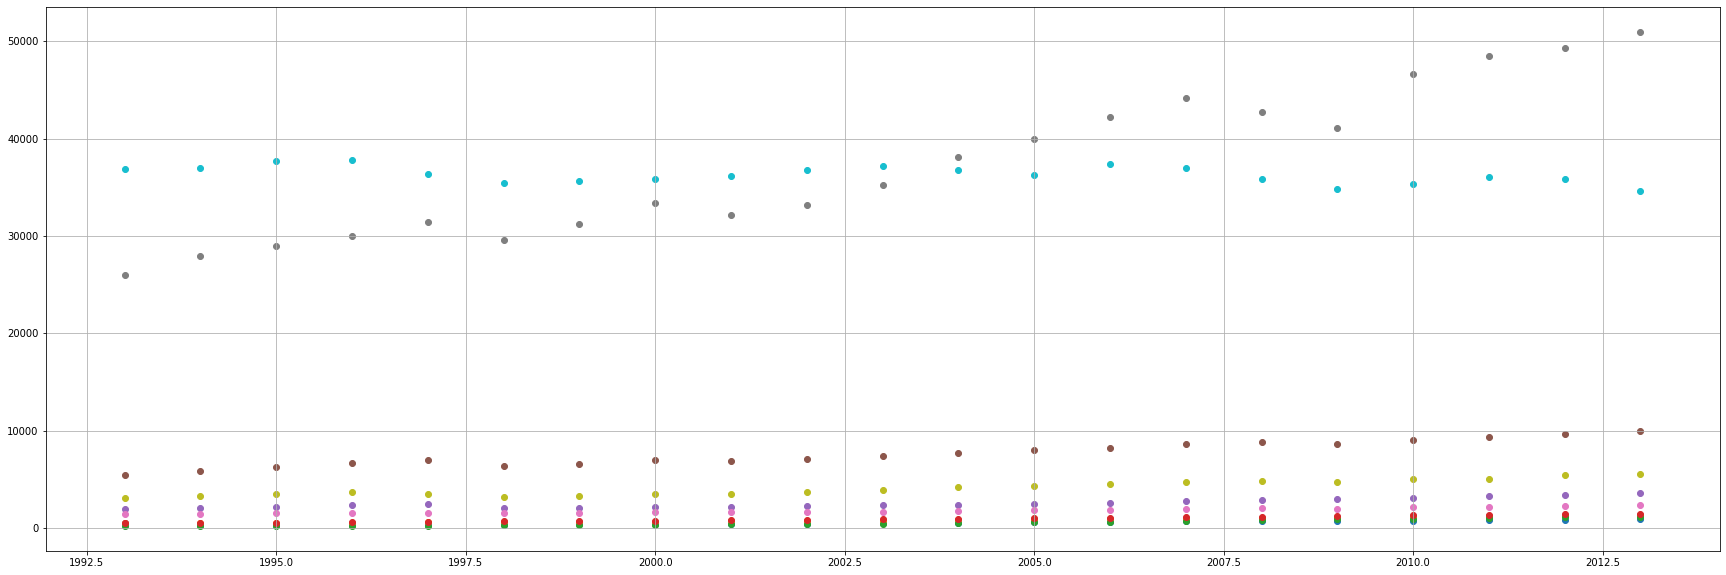

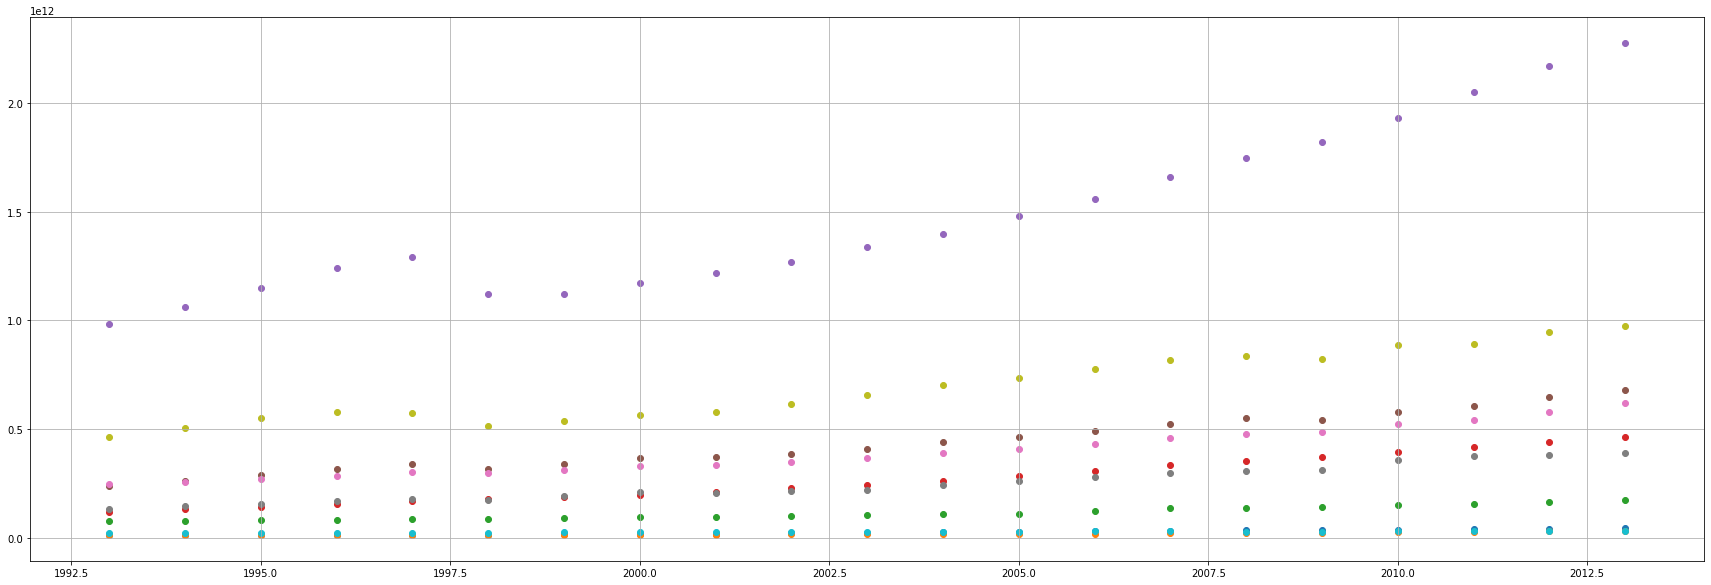

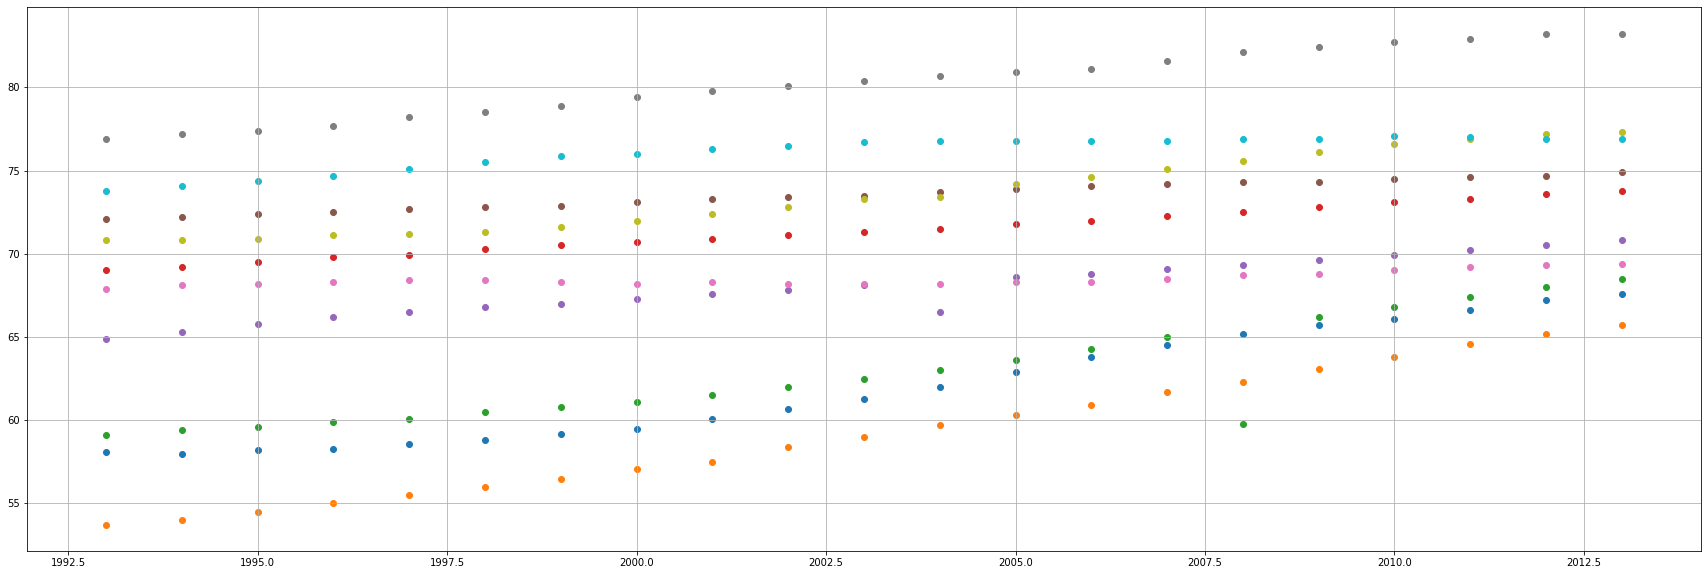

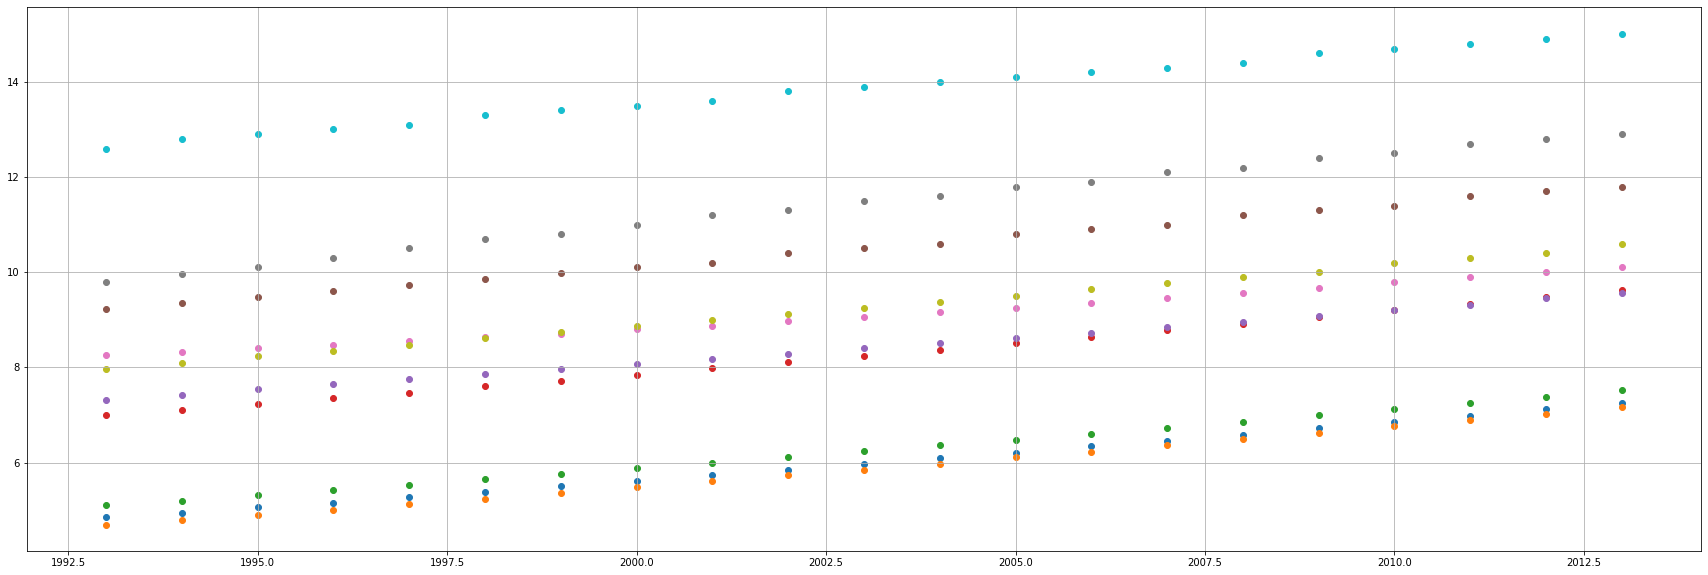

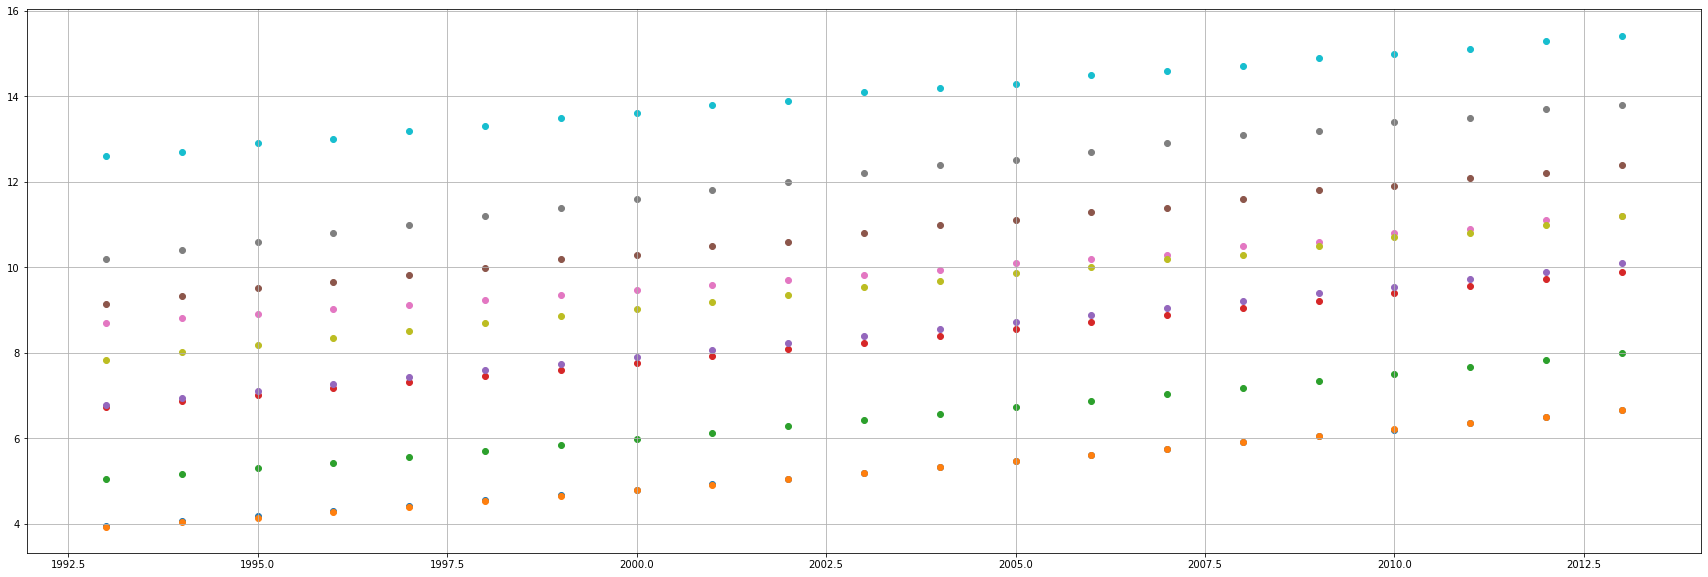

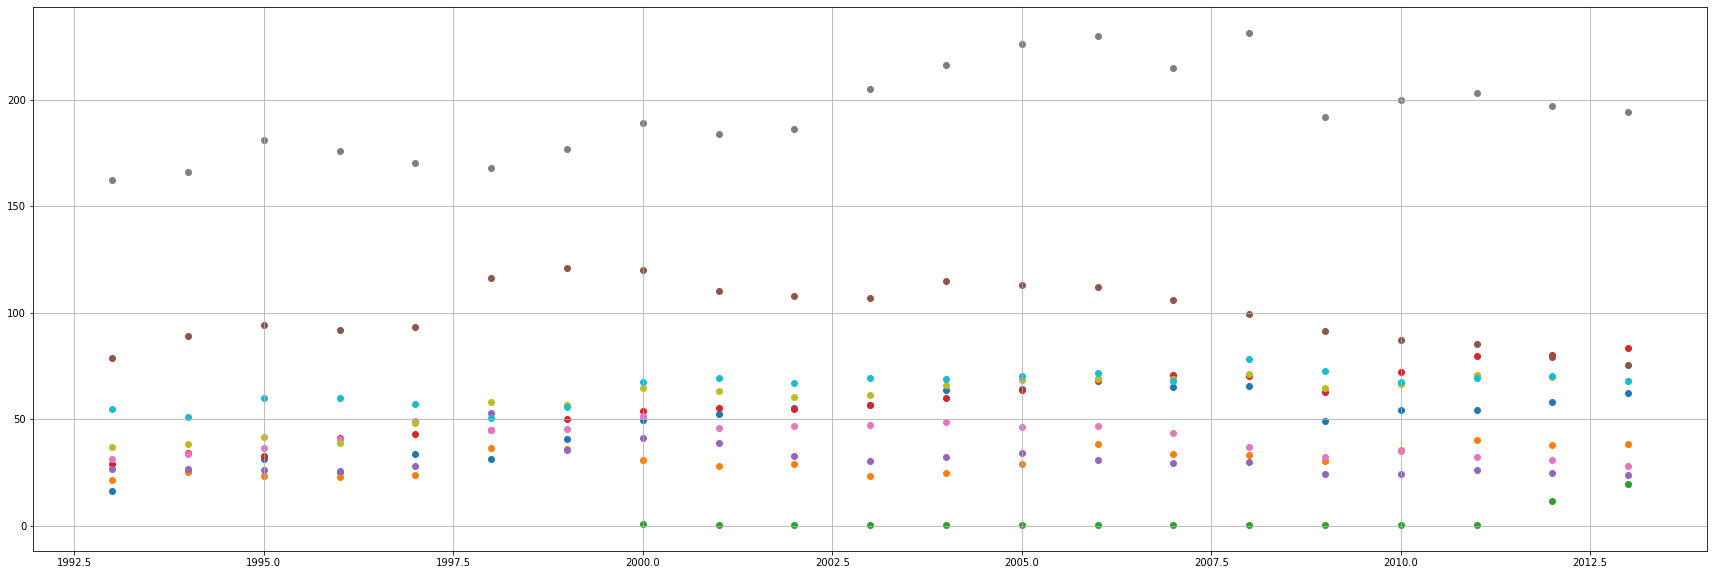

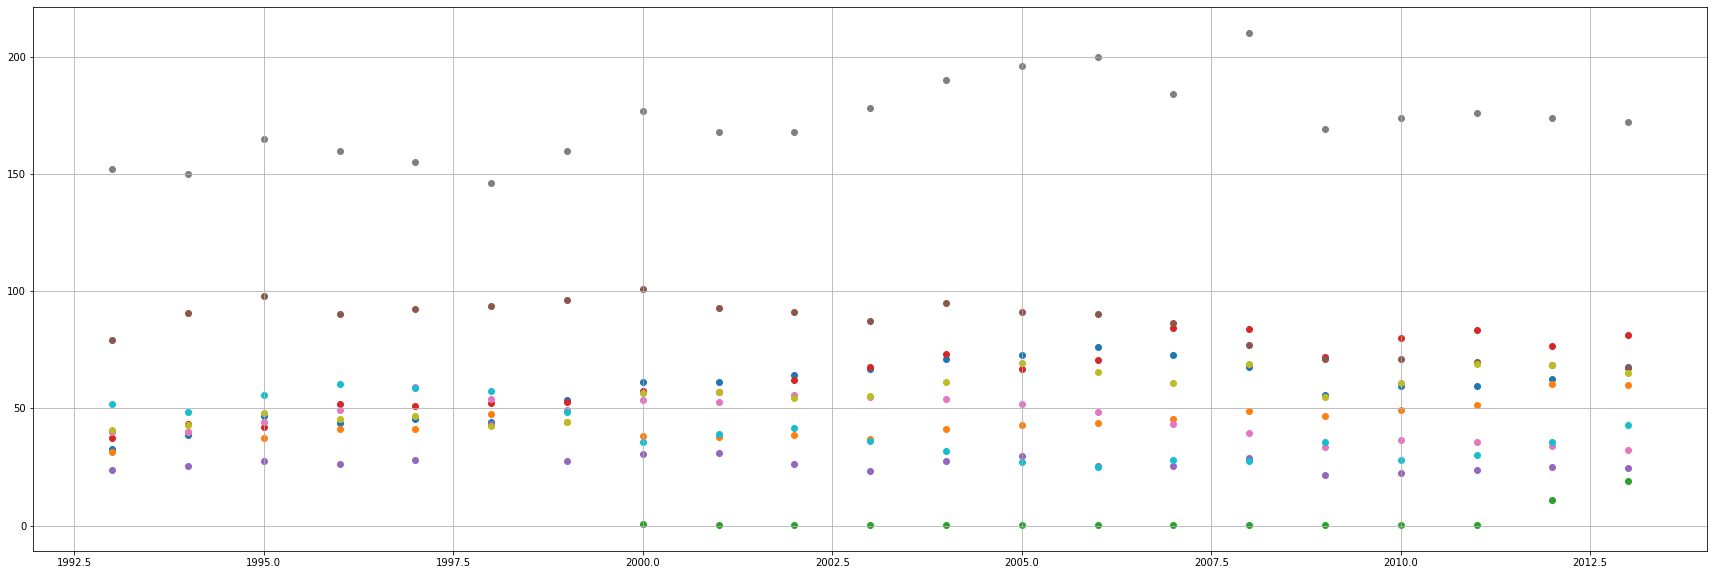

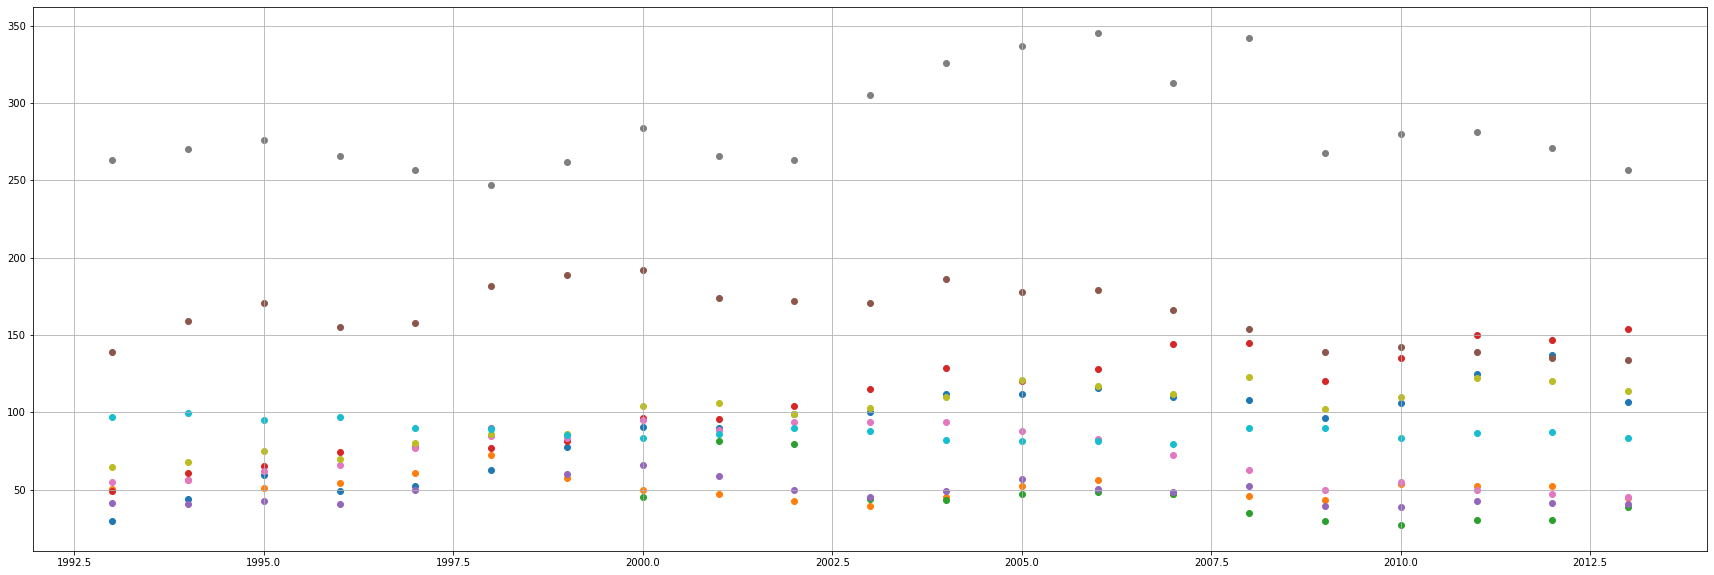

In [38]:
indicadores_t = [aseancapita_t, aseangdp_t, aseanexpvida_t, aseanmenschool_t, aseanwomenschool_t, aseanexports_t, aseanimports_t, aseantrade_t]
for indicador in indicadores_t:
    plt.figure(figsize=(30,10))
    for pais in indicador.columns:
        plt.scatter(x=indicador.index, y=indicador[pais])
        plt.grid(True)

In [39]:
antes_1990 = ["Indonesia", "Malaysia", "Philippines", "Singapore", "Thailand", "Brunei"]

In [40]:
indicadores = [aseancapita, aseangdp, aseanexpvida, aseanmenschool, aseanwomenschool, aseanexports, aseanimports, aseantrade]
for indicador in indicadores:
    indicador.loc[:,"Membro_antes_de_1990"] = "Não"
    indicador.loc[antes_1990,"Membro_antes_de_1990"] = "Sim"

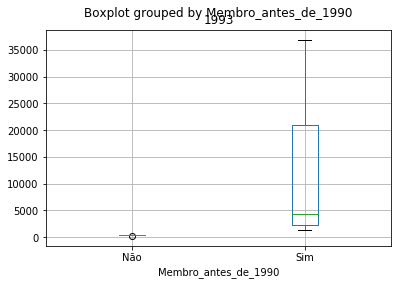

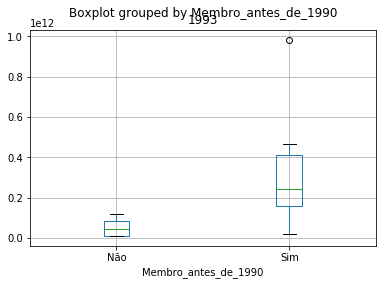

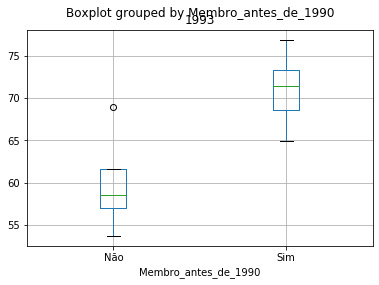

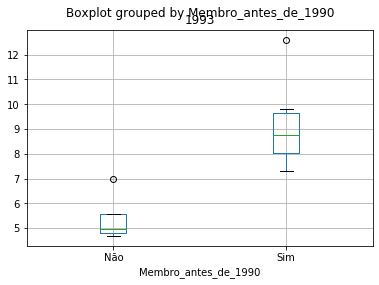

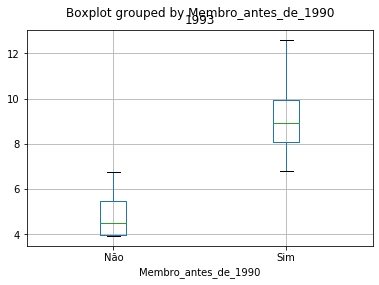

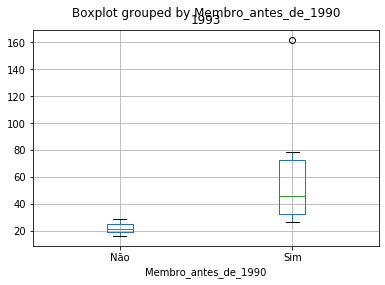

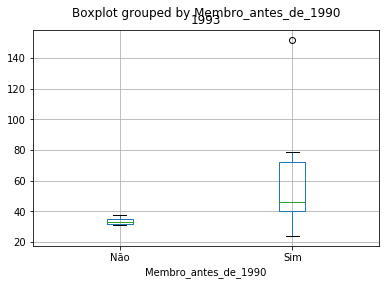

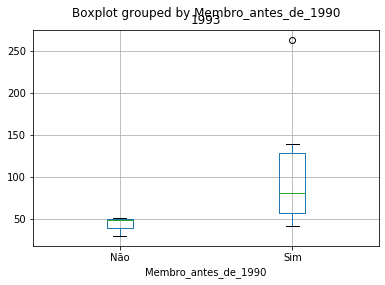

In [41]:
for indicador in indicadores:
    indicador.boxplot(column=1993, by="Membro_antes_de_1990")

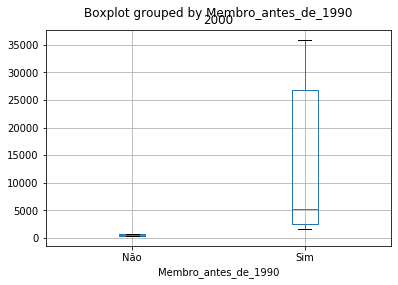

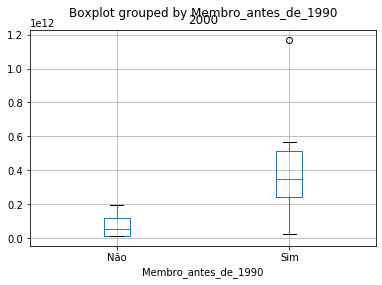

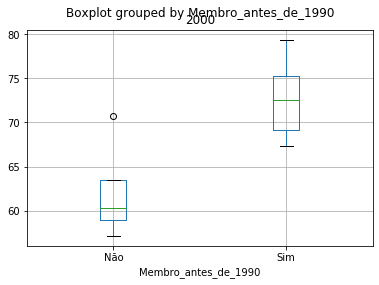

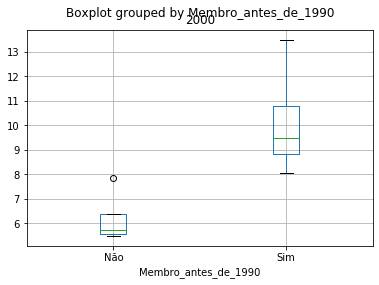

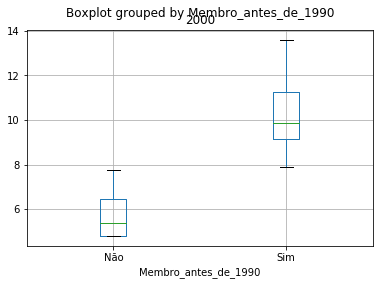

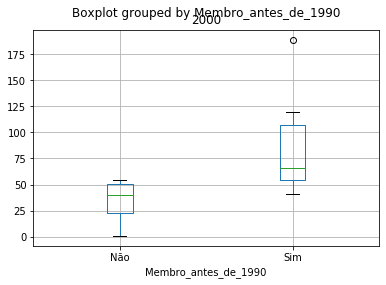

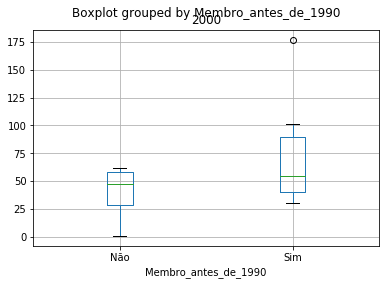

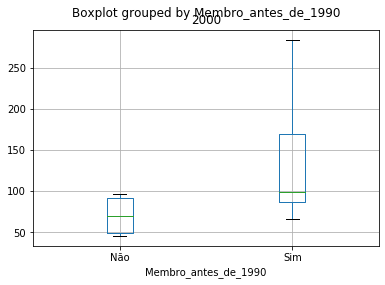

In [42]:
for indicador in indicadores:
    indicador.boxplot(column=2000, by="Membro_antes_de_1990")

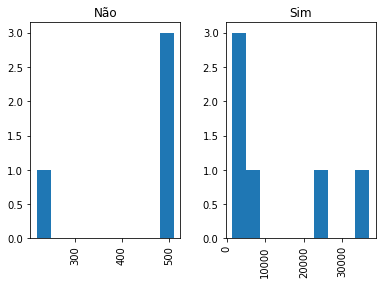

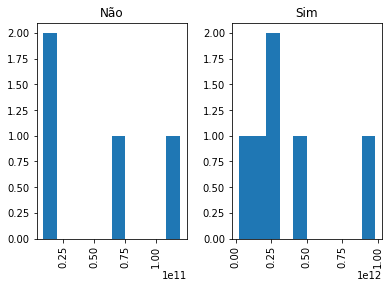

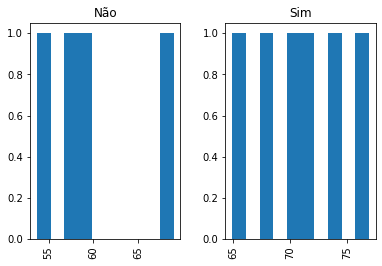

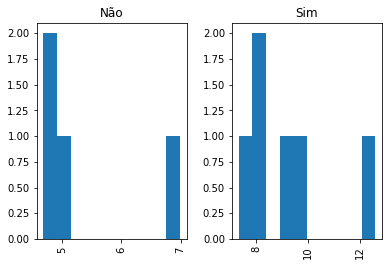

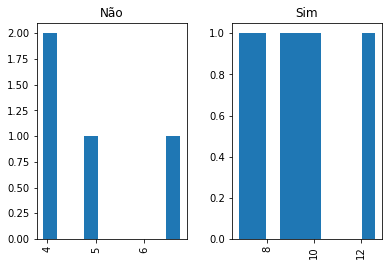

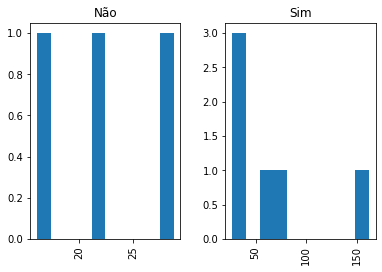

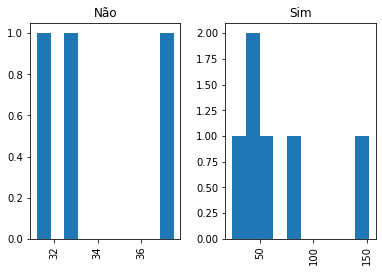

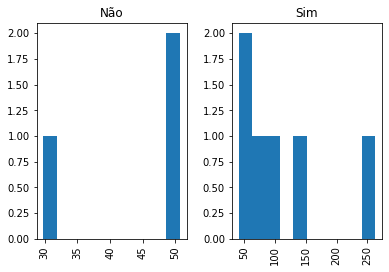

In [43]:
for indicador in indicadores:
    indicador.hist(column=1993, by="Membro_antes_de_1990")

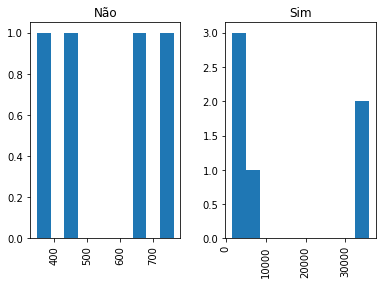

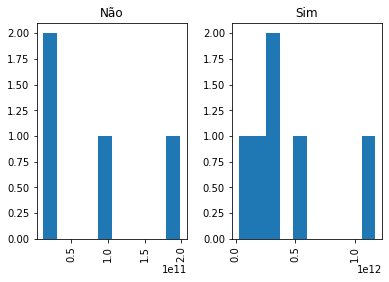

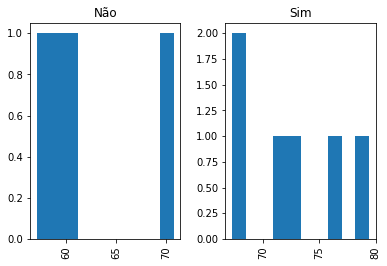

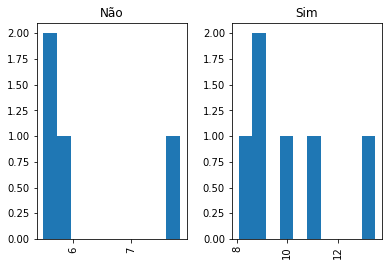

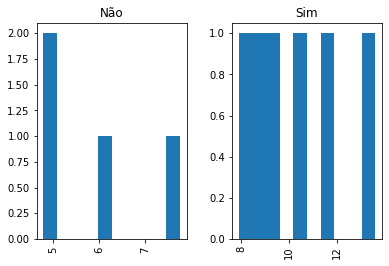

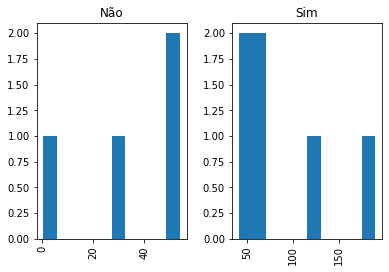

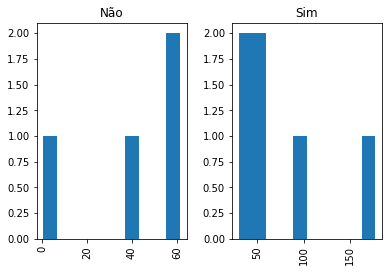

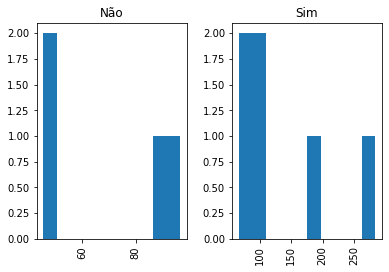

In [44]:
for indicador in indicadores:
    indicador.hist(column=2000, by="Membro_antes_de_1990")

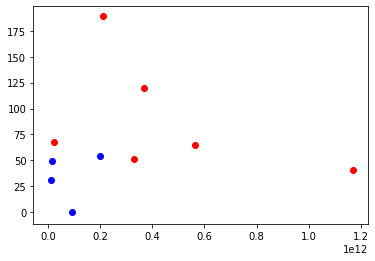

In [48]:
plt.scatter(aseangdp.loc[aseangdp.Membro_antes_de_1990=="Sim",2000], aseanexports.loc[aseanexports.Membro_antes_de_1990=="Sim", 2000], color="r")
plt.scatter(aseangdp.loc[aseangdp.Membro_antes_de_1990=="Não",2000], aseanexports.loc[aseanexports.Membro_antes_de_1990=="Não", 2000], color="b")

In [49]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()


Ajuste linear entre X3 e X4:
Coeficiente linear: 117.00861328737204
Coeficiente angular: -6.320414217478324e-11
Ajuste linear entre X3 e X4:
Coeficiente linear: 29.601417806131956
Coeficiente angular: 5.0713304515689416e-11


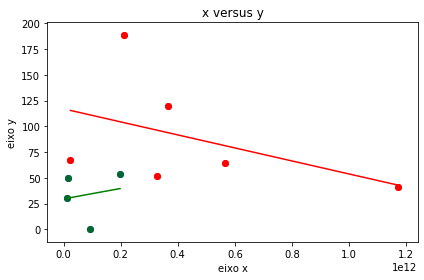

In [51]:
plt.scatter(aseangdp.loc[aseangdp.Membro_antes_de_1990=="Sim",2000], aseanexports.loc[aseanexports.Membro_antes_de_1990=="Sim", 2000], color="r")
reta(aseangdp.loc[aseangdp.Membro_antes_de_1990=="Sim",2000], aseanexports.loc[aseanexports.Membro_antes_de_1990=="Sim", 2000], "r")
plt.scatter(aseangdp.loc[aseangdp.Membro_antes_de_1990=="Não",2000], aseanexports.loc[aseanexports.Membro_antes_de_1990=="Não", 2000], color="b")
reta(aseangdp.loc[aseangdp.Membro_antes_de_1990=="Não",2000], aseanexports.loc[aseanexports.Membro_antes_de_1990=="Não", 2000], "g")

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.0
Coeficiente angular: 1.0
Ajuste linear entre X3 e X4:
Coeficiente linear: 1.1368683772161603e-13
Coeficiente angular: 0.9999999999999998


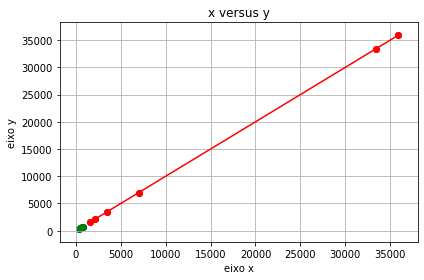

Ajuste linear entre X3 e X4:
Coeficiente linear: 673965498150.8411
Coeficiente angular: -16506142.108537428
Ajuste linear entre X3 e X4:
Coeficiente linear: -24342573505.14926
Coeficiente angular: 188729789.34023374


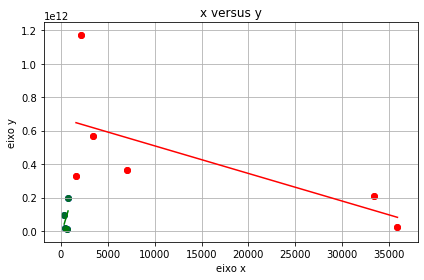

Ajuste linear entre X3 e X4:
Coeficiente linear: 69.19621634206197
Coeficiente angular: 0.0002493139601009119
Ajuste linear entre X3 e X4:
Coeficiente linear: 53.813787534082415
Coeficiente angular: 0.014984109341623105


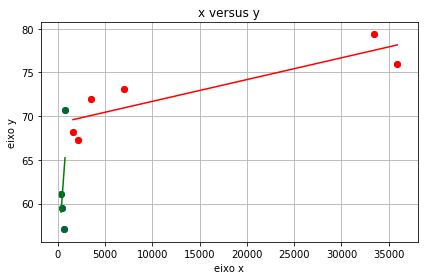

Ajuste linear entre X3 e X4:
Coeficiente linear: 8.512699000423646
Coeficiente angular: 0.00011079748560174954
Ajuste linear entre X3 e X4:
Coeficiente linear: 4.298297181361908
Coeficiente angular: 0.003447925530991125


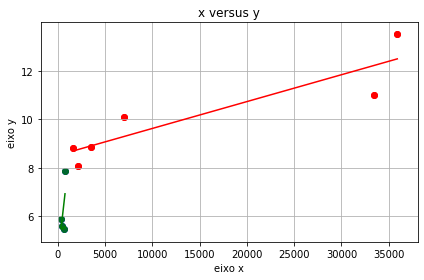

Ajuste linear entre X3 e X4:
Coeficiente linear: 8.726699637801469
Coeficiente angular: 0.00011422176931502876
Ajuste linear entre X3 e X4:
Coeficiente linear: 4.039656961497718
Coeficiente angular: 0.003251072402354942


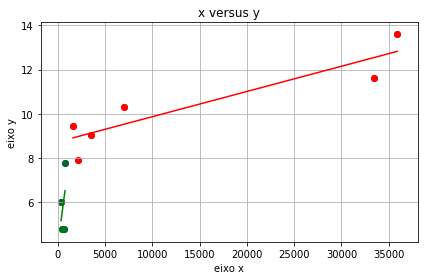

Ajuste linear entre X3 e X4:
Coeficiente linear: 61.93976130773136
Coeficiente angular: 0.0019391933926438203
Ajuste linear entre X3 e X4:
Coeficiente linear: -8.445340203365681
Coeficiente angular: 0.07613940362272276


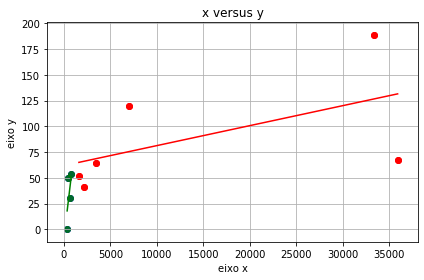

Ajuste linear entre X3 e X4:
Coeficiente linear: 55.200207243207345
Coeficiente angular: 0.0014726862612638402
Ajuste linear entre X3 e X4:
Coeficiente linear: -3.5135437079939535
Coeficiente angular: 0.07765875896563101


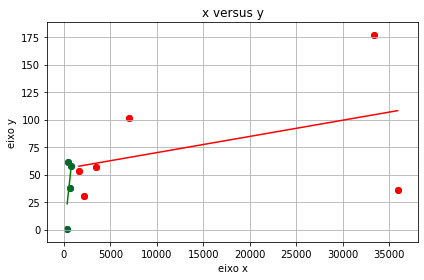

Ajuste linear entre X3 e X4:
Coeficiente linear: 105.44437944971776
Coeficiente angular: 0.0022956623958536094
Ajuste linear entre X3 e X4:
Coeficiente linear: 43.033103367430236
Coeficiente angular: 0.04989493061947516


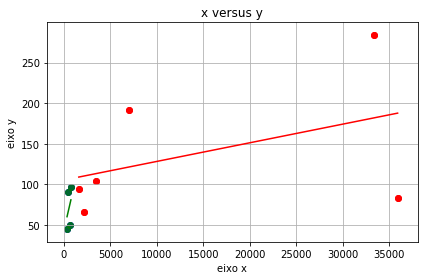

Ajuste linear entre X3 e X4:
Coeficiente linear: 26053.759117094654
Coeficiente angular: -2.7315981803454877e-08
Ajuste linear entre X3 e X4:
Coeficiente linear: 476.26799438264396
Coeficiente angular: 9.58850429457745e-10


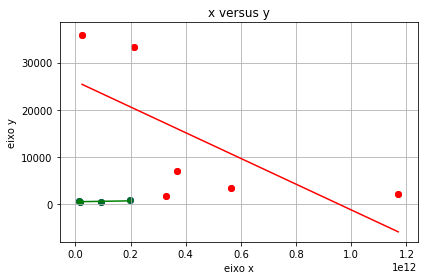

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.0
Coeficiente angular: 1.0
Ajuste linear entre X3 e X4:
Coeficiente linear: 1.52587890625e-05
Coeficiente angular: 0.9999999999999999


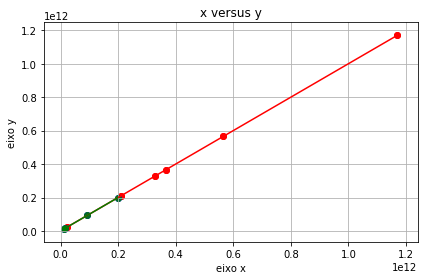

Ajuste linear entre X3 e X4:
Coeficiente linear: 76.29170786052819
Coeficiente angular: -8.16083114331725e-12
Ajuste linear entre X3 e X4:
Coeficiente linear: 56.79144228914428
Coeficiente angular: 6.633624131028701e-11


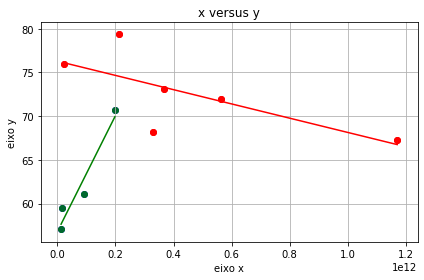

Ajuste linear entre X3 e X4:
Coeficiente linear: 11.800093472800429
Coeficiente angular: -3.9286210553814255e-12
Ajuste linear entre X3 e X4:
Coeficiente linear: 5.228768854709863
Coeficiente angular: 1.2199077104531543e-11


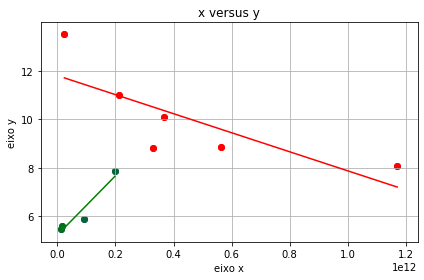

Ajuste linear entre X3 e X4:
Coeficiente linear: 12.269176935446193
Coeficiente angular: -4.3955656658701595e-12
Ajuste linear entre X3 e X4:
Coeficiente linear: 4.543602164312187
Coeficiente angular: 1.616867023664871e-11


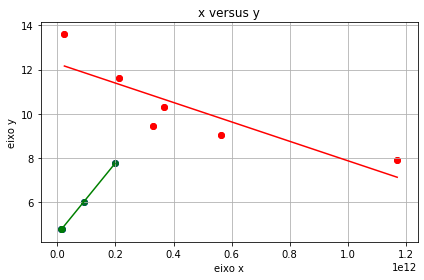

Ajuste linear entre X3 e X4:
Coeficiente linear: 117.00861328737204
Coeficiente angular: -6.320414217478324e-11
Ajuste linear entre X3 e X4:
Coeficiente linear: 29.601417806131956
Coeficiente angular: 5.0713304515689416e-11


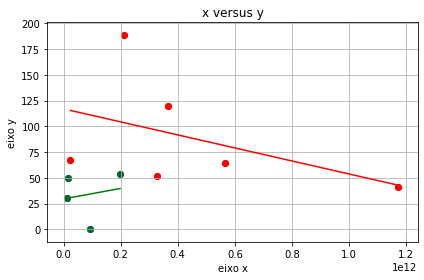

Ajuste linear entre X3 e X4:
Coeficiente linear: 98.90400073873568
Coeficiente angular: -5.22377324149835e-11
Ajuste linear entre X3 e X4:
Coeficiente linear: 38.32564046042643
Coeficiente angular: 1.3822049854090133e-11


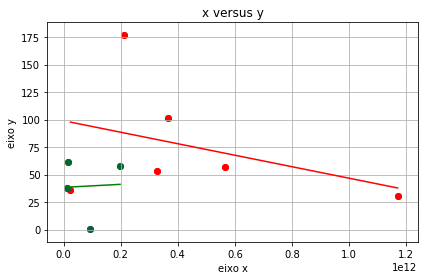

Ajuste linear entre X3 e X4:
Coeficiente linear: 174.77007119552394
Coeficiente angular: -8.412893110203496e-11
Ajuste linear entre X3 e X4:
Coeficiente linear: 60.52397081957128
Coeficiente angular: 1.2622341993662878e-10


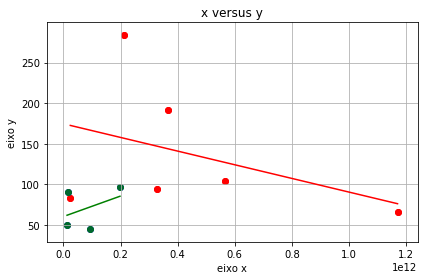

Ajuste linear entre X3 e X4:
Coeficiente linear: -210338.4881889763
Coeficiente angular: 3086.125984251967
Ajuste linear entre X3 e X4:
Coeficiente linear: -451.120689655172
Coeficiente angular: 16.16941529235382


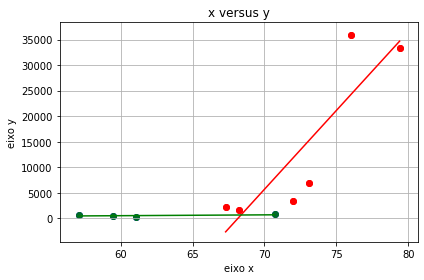

Ajuste linear entre X3 e X4:
Coeficiente linear: 4879933543307.086
Coeficiente angular: -61042204724.40943
Ajuste linear entre X3 e X4:
Coeficiente linear: -794949568965.5171
Coeficiente angular: 14089767616.191902


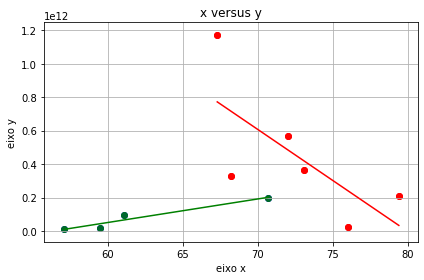

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.0
Coeficiente angular: 1.0
Ajuste linear entre X3 e X4:
Coeficiente linear: 1.4210854715202004e-14
Coeficiente angular: 0.9999999999999998


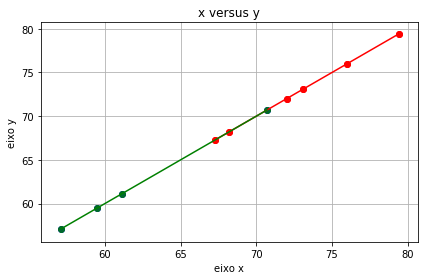

Ajuste linear entre X3 e X4:
Coeficiente linear: -13.922253543307072
Coeficiente angular: 0.32996220472440924
Ajuste linear entre X3 e X4:
Coeficiente linear: -5.225775862068959
Coeficiente angular: 0.1840704647676161


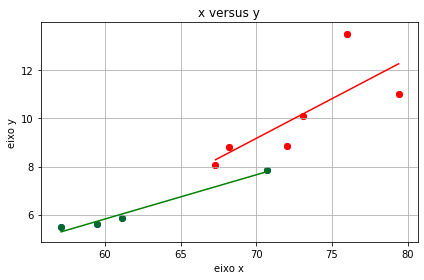

Ajuste linear entre X3 e X4:
Coeficiente linear: -15.210503937007859
Coeficiente angular: 0.35129133858267697
Ajuste linear entre X3 e X4:
Coeficiente linear: -8.361939655172407
Coeficiente angular: 0.22865442278860562


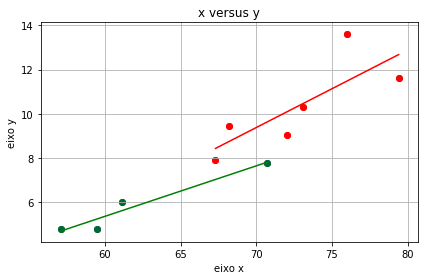

Ajuste linear entre X3 e X4:
Coeficiente linear: -636.4379212598421
Coeficiente angular: 9.982173228346452
Ajuste linear entre X3 e X4:
Coeficiente linear: -71.5477284482758
Coeficiente angular: 1.6941622938530727


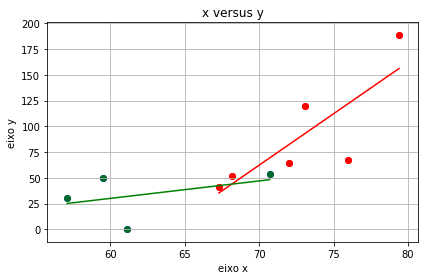

Ajuste linear entre X3 e X4:
Coeficiente linear: -552.5725669291337
Coeficiente angular: 8.64595275590551
Ajuste linear entre X3 e X4:
Coeficiente linear: -43.915038793103406
Coeficiente angular: 1.3421383058470757


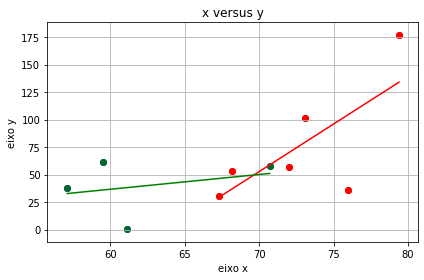

Ajuste linear entre X3 e X4:
Coeficiente linear: -841.9109291338581
Coeficiente angular: 13.476755905511807
Ajuste linear entre X3 e X4:
Coeficiente linear: -103.97887931034472
Coeficiente angular: 2.8116566716641667


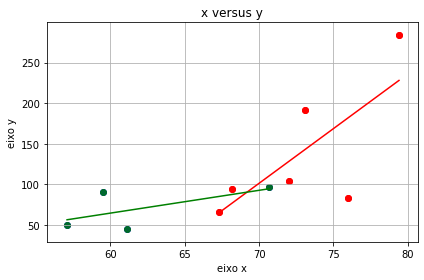

Ajuste linear entre X3 e X4:
Coeficiente linear: -60141.97971719777
Coeficiente angular: 7365.686694897839
Ajuste linear entre X3 e X4:
Coeficiente linear: -114.46657004307463
Coeficiente angular: 107.56914908026988


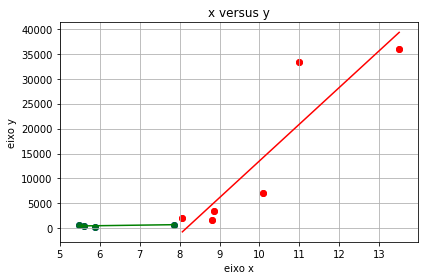

Ajuste linear entre X3 e X4:
Coeficiente linear: 2031044302978.4812
Coeficiente angular: -157816439878.5163
Ajuste linear entre X3 e X4:
Coeficiente linear: -384798638690.9762
Coeficiente angular: 74911142415.95103


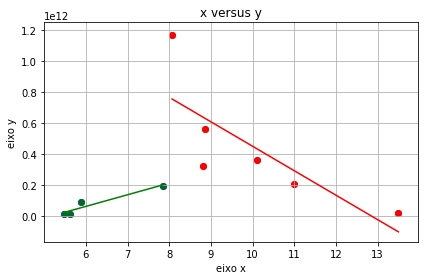

Ajuste linear entre X3 e X4:
Coeficiente linear: 54.84851896300769
Coeficiente angular: 1.77206839419781
Ajuste linear entre X3 e X4:
Coeficiente linear: 29.078836724189287
Coeficiente angular: 5.321702381274892


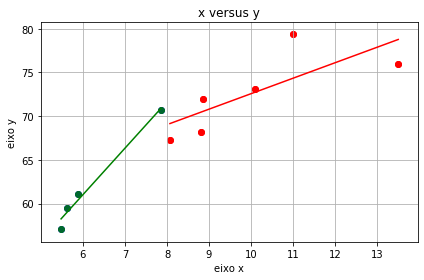

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.0
Coeficiente angular: 1.0
Ajuste linear entre X3 e X4:
Coeficiente linear: 0.0
Coeficiente angular: 1.0


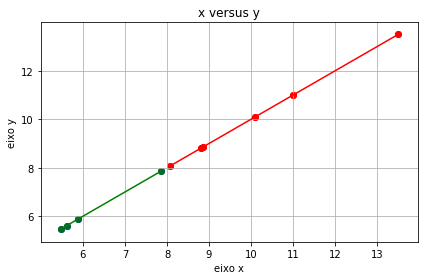

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.156225235351382
Coeficiente angular: 1.010486467559949
Ajuste linear entre X3 e X4:
Coeficiente linear: -1.7372462276162874
Coeficiente angular: 1.2207487876899739


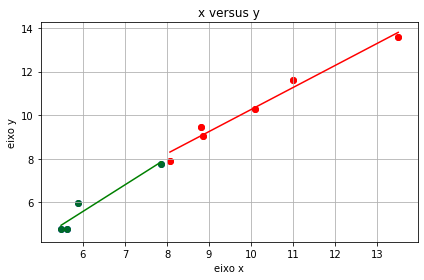

Ajuste linear entre X3 e X4:
Coeficiente linear: -9.476968422192172
Coeficiente angular: 9.787200572404327
Ajuste linear entre X3 e X4:
Coeficiente linear: -28.167226031479444
Coeficiente angular: 9.96405737815946


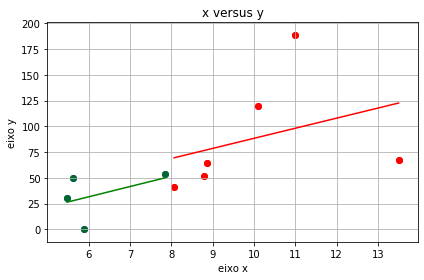

Ajuste linear entre X3 e X4:
Coeficiente linear: 24.643182273734105
Coeficiente angular: 5.077754124939423
Ajuste linear entre X3 e X4:
Coeficiente linear: -11.259408568796935
Coeficiente angular: 8.169405087638506


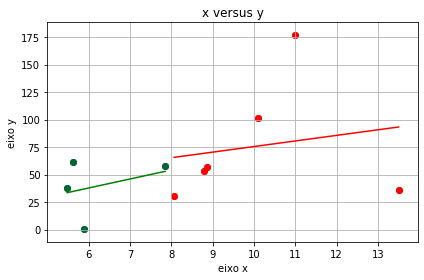

Ajuste linear entre X3 e X4:
Coeficiente linear: 40.34438975254169
Coeficiente angular: 9.652472426400628
Ajuste linear entre X3 e X4:
Coeficiente linear: -20.239511825102284
Coeficiente angular: 14.643756941998756


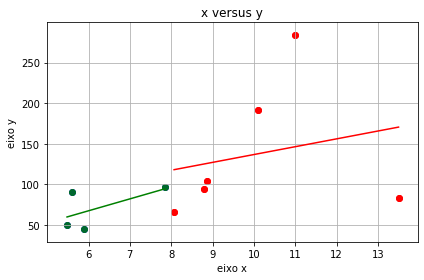

Ajuste linear entre X3 e X4:
Coeficiente linear: -60986.98143847007
Coeficiente angular: 7260.773645085951
Ajuste linear entre X3 e X4:
Coeficiente linear: 184.53178593857348
Coeficiente angular: 63.1208932011009


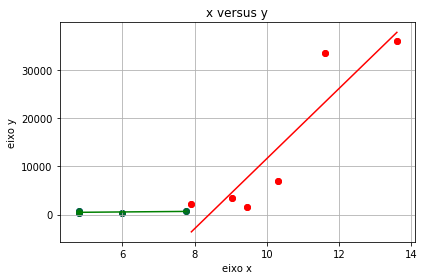

Ajuste linear entre X3 e X4:
Coeficiente linear: 2186074858475.613
Coeficiente angular: -168840858656.76376
Ajuste linear entre X3 e X4:
Coeficiente linear: -280667639162.26575
Coeficiente angular: 61788888935.72004


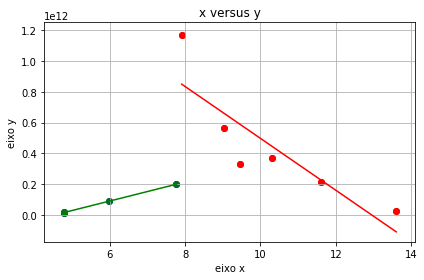

Ajuste linear entre X3 e X4:
Coeficiente linear: 54.05549130797647
Coeficiente angular: 1.803991149469163
Ajuste linear entre X3 e X4:
Coeficiente linear: 38.08461175340028
Coeficiente angular: 4.113985138603805


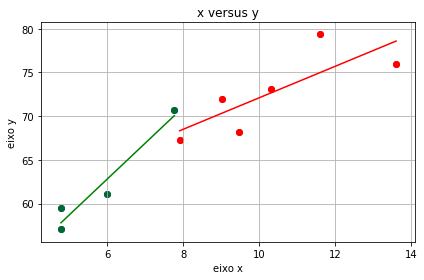

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.08671197603627867
Coeficiente angular: 0.9662314724359017
Ajuste linear entre X3 e X4:
Coeficiente linear: 1.7702429412582887
Coeficiente angular: 0.7597014233390512


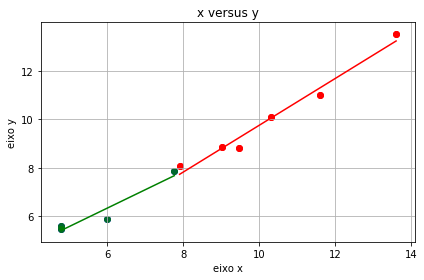

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.0
Coeficiente angular: 1.0
Ajuste linear entre X3 e X4:
Coeficiente linear: 8.881784197001252e-16
Coeficiente angular: 0.9999999999999999


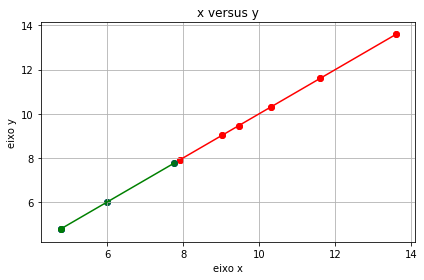

Ajuste linear entre X3 e X4:
Coeficiente linear: -29.08856709388168
Coeficiente angular: 11.439925728001453
Ajuste linear entre X3 e X4:
Coeficiente linear: 13.25872836857613
Coeficiente angular: 3.4948216927492712


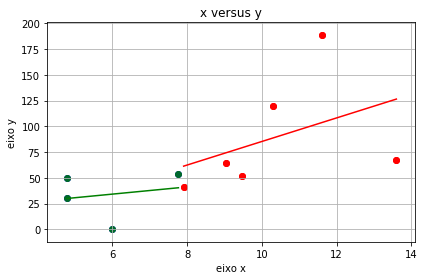

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.028514495332103706
Coeficiente angular: 7.334877431793333
Ajuste linear entre X3 e X4:
Coeficiente linear: 32.053166632245784
Coeficiente angular: 1.2639971507930123


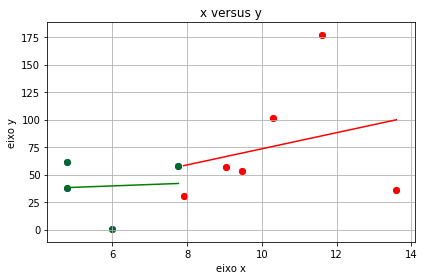

Ajuste linear entre X3 e X4:
Coeficiente linear: 6.58580534654871
Coeficiente angular: 12.679889627151981
Ajuste linear entre X3 e X4:
Coeficiente linear: 24.040687602999277
Coeficiente angular: 7.98018199520355


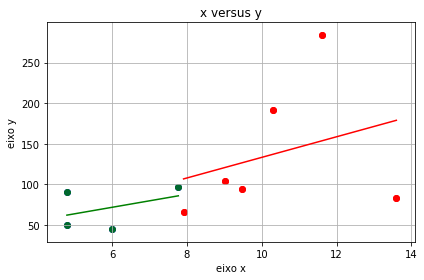

Ajuste linear entre X3 e X4:
Coeficiente linear: -442.1921140512968
Coeficiente angular: 161.49391432591412
Ajuste linear entre X3 e X4:
Coeficiente linear: 385.90677886449953
Coeficiente angular: 4.96418485388336


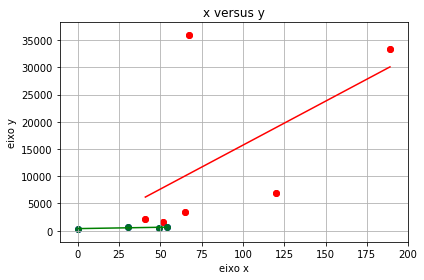

Ajuste linear entre X3 e X4:
Coeficiente linear: 727061549049.855
Coeficiente angular: -3180602125.7479954
Ajuste linear entre X3 e X4:
Coeficiente linear: 58119112202.61067
Coeficiente angular: 650803639.2839913


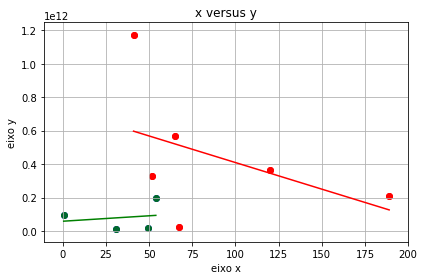

Ajuste linear entre X3 e X4:
Coeficiente linear: 66.69414605617806
Coeficiente angular: 0.0671572782288824
Ajuste linear entre X3 e X4:
Coeficiente linear: 58.65458936425331
Coeficiente angular: 0.10235995917220671


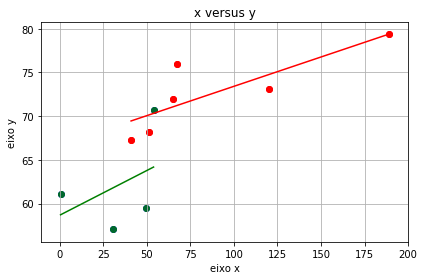

Ajuste linear entre X3 e X4:
Coeficiente linear: 8.964627824583411
Coeficiente angular: 0.012260556695089079
Ajuste linear entre X3 e X4:
Coeficiente linear: 5.504100541804417
Coeficiente angular: 0.020823073795722884


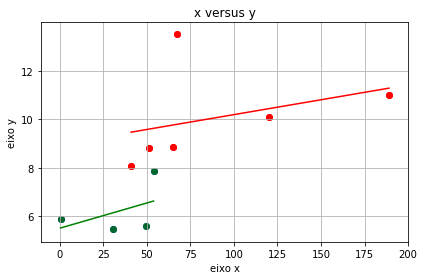

Ajuste linear entre X3 e X4:
Coeficiente linear: 8.983793578681496
Coeficiente angular: 0.014987328575545425
Ajuste linear entre X3 e X4:
Coeficiente linear: 5.442471991915684
Coeficiente angular: 0.011735916282334722


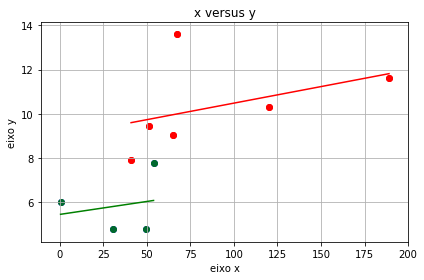

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.0
Coeficiente angular: 1.0
Ajuste linear entre X3 e X4:
Coeficiente linear: 0.0
Coeficiente angular: 1.0


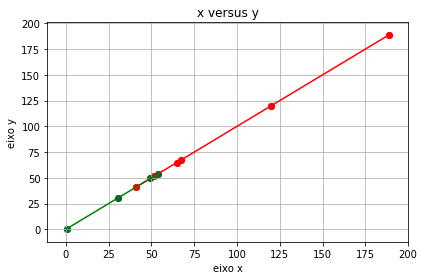

Ajuste linear entre X3 e X4:
Coeficiente linear: -10.50797765760879
Coeficiente angular: 0.9693550711125426
Ajuste linear entre X3 e X4:
Coeficiente linear: 1.2699113205308024
Coeficiente angular: 1.133752885255214


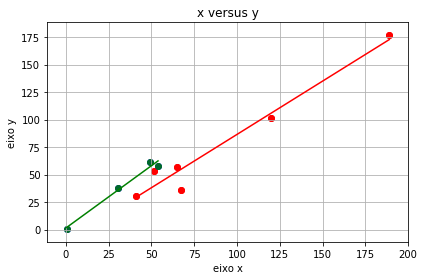

Ajuste linear entre X3 e X4:
Coeficiente linear: 5.397069383465265
Coeficiente angular: 1.4842908240240038
Ajuste linear entre X3 e X4:
Coeficiente linear: 37.522538576828225
Coeficiente angular: 0.9834434724907871


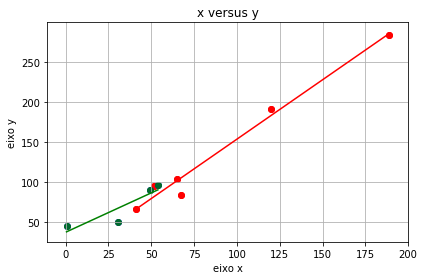

Ajuste linear entre X3 e X4:
Coeficiente linear: 4438.062347267631
Coeficiente angular: 125.25677216291108
Ajuste linear entre X3 e X4:
Coeficiente linear: 400.75826164260855
Coeficiente angular: 3.8608922595976973


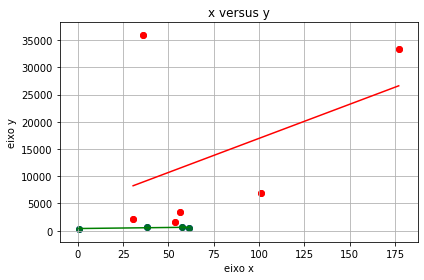

Ajuste linear entre X3 e X4:
Coeficiente linear: 647435673736.3953
Coeficiente angular: -2684751304.311695
Ajuste linear entre X3 e X4:
Coeficiente linear: 74691585572.52634
Coeficiente angular: 135256853.3598853


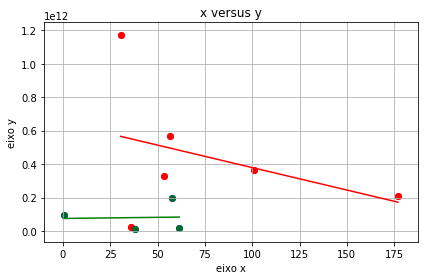

Ajuste linear entre X3 e X4:
Coeficiente linear: 68.16956543286182
Coeficiente angular: 0.059406885519218675
Ajuste linear entre X3 e X4:
Coeficiente linear: 59.66175592266061
Coeficiente angular: 0.06183453885103715


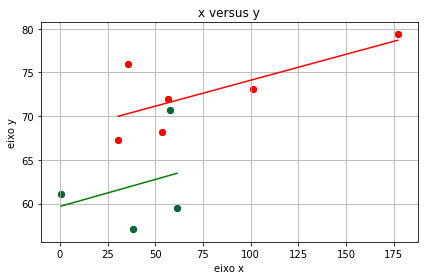

Ajuste linear entre X3 e X4:
Coeficiente linear: 9.563215099112107
Coeficiente angular: 0.006496498030223154
Ajuste linear entre X3 e X4:
Coeficiente linear: 5.691661468522441
Coeficiente angular: 0.013018406017424006


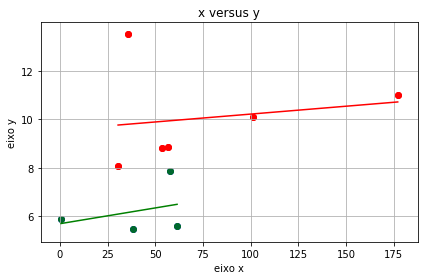

Ajuste linear entre X3 e X4:
Coeficiente linear: 9.57374041189155
Coeficiente angular: 0.009814085267835115
Ajuste linear entre X3 e X4:
Coeficiente linear: 5.7098729035731175
Coeficiente angular: 0.0032366581860273276


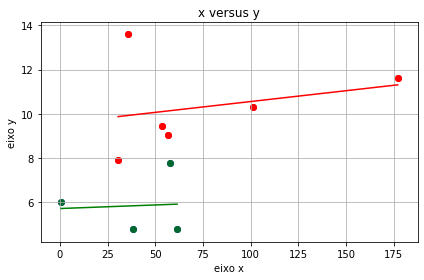

Ajuste linear entre X3 e X4:
Coeficiente linear: 13.989706217154136
Coeficiente angular: 0.9900082842295799
Ajuste linear entre X3 e X4:
Coeficiente linear: -0.4299531300073056
Coeficiente angular: 0.8645242255291057


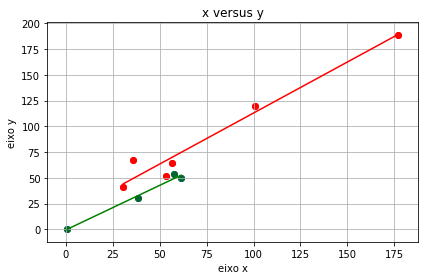

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.0
Coeficiente angular: 1.0
Ajuste linear entre X3 e X4:
Coeficiente linear: 0.0
Coeficiente angular: 1.0


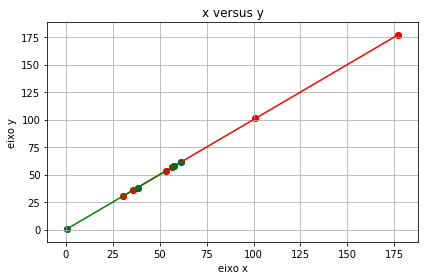

Ajuste linear entre X3 e X4:
Coeficiente linear: 23.395635652311654
Coeficiente angular: 1.5060021710394762
Ajuste linear entre X3 e X4:
Coeficiente linear: 38.1078767126911
Coeficiente angular: 0.8246431692052446


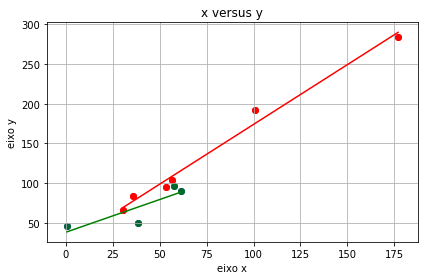

Ajuste linear entre X3 e X4:
Coeficiente linear: 2244.3810426893797
Coeficiente angular: 84.97539270240625
Ajuste linear entre X3 e X4:
Coeficiente linear: 362.60409963838447
Coeficiente angular: 2.6958711555626973


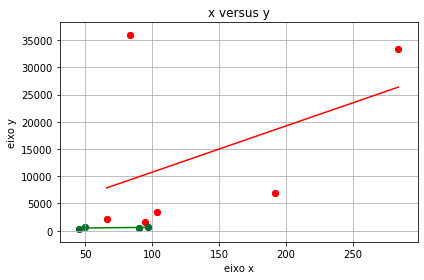

Ajuste linear entre X3 e X4:
Coeficiente linear: 702750885088.5258
Coeficiente angular: -1881738610.5424001
Ajuste linear entre X3 e X4:
Coeficiente linear: -14779881721.350784
Coeficiente angular: 1342370006.6739933


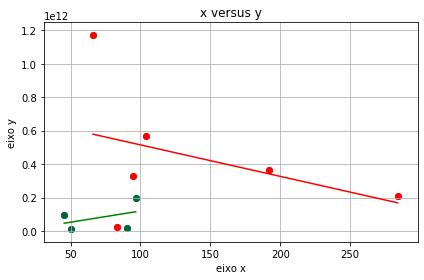

Ajuste linear entre X3 e X4:
Coeficiente linear: 67.12946678443359
Coeficiente angular: 0.04029985358248236
Ajuste linear entre X3 e X4:
Coeficiente linear: 52.15739751783739
Coeficiente angular: 0.14078021213681569


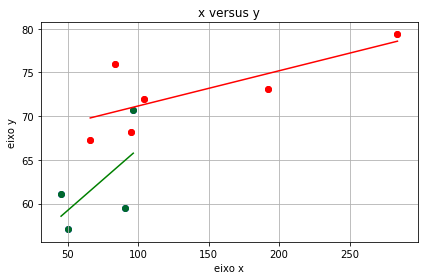

Ajuste linear entre X3 e X4:
Coeficiente linear: 9.316539746055176
Coeficiente angular: 0.005374528776891009
Ajuste linear entre X3 e X4:
Coeficiente linear: 4.413883537052395
Coeficiente angular: 0.025360941068284678


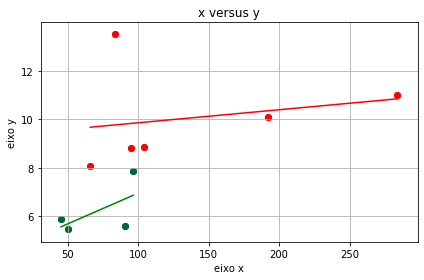

Ajuste linear entre X3 e X4:
Coeficiente linear: 9.302163630099585
Coeficiente angular: 0.007383573774141795
Ajuste linear entre X3 e X4:
Coeficiente linear: 4.269061582545808
Coeficiente angular: 0.02220797759227176


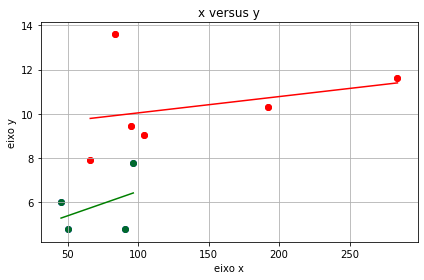

Ajuste linear entre X3 e X4:
Coeficiente linear: -1.7141720591373826
Coeficiente angular: 0.6597343915026981
Ajuste linear entre X3 e X4:
Coeficiente linear: -23.89909856163122
Coeficiente angular: 0.8149925460053978


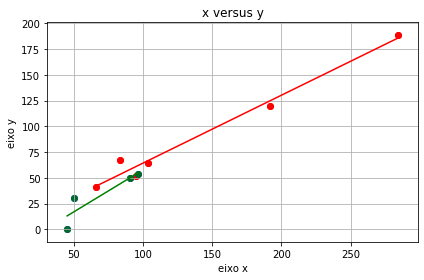

Ajuste linear entre X3 e X4:
Coeficiente linear: -14.354726189070163
Coeficiente angular: 0.6554201323804233
Ajuste linear entre X3 e X4:
Coeficiente linear: -23.86333670473619
Coeficiente angular: 0.8962136170582115


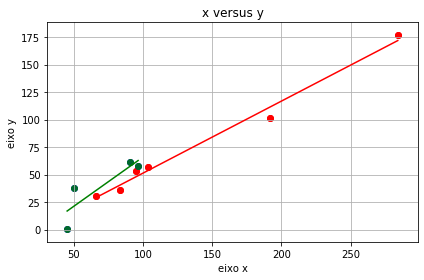

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.0
Coeficiente angular: 1.0
Ajuste linear entre X3 e X4:
Coeficiente linear: 1.4210854715202004e-14
Coeficiente angular: 0.9999999999999999


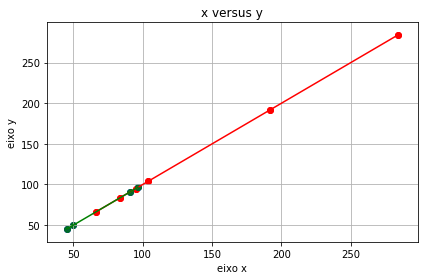

In [55]:
for indicador1 in indicadores:
    for indicador2 in indicadores:
        plt.scatter(indicador1.loc[indicador1.Membro_antes_de_1990=="Sim",2000], indicador2.loc[indicador2.Membro_antes_de_1990=="Sim", 2000], color="r")
        reta(indicador1.loc[indicador1.Membro_antes_de_1990=="Sim",2000], indicador2.loc[indicador2.Membro_antes_de_1990=="Sim", 2000], "r")
        plt.scatter(indicador1.loc[indicador1.Membro_antes_de_1990=="Não",2000], indicador2.loc[indicador2.Membro_antes_de_1990=="Não", 2000], color="b")
        reta(indicador1.loc[indicador1.Membro_antes_de_1990=="Não",2000], indicador2.loc[indicador2.Membro_antes_de_1990=="Não", 2000], "g")
        plt.grid(True)
        plt.show()

In [ ]:
tempo = np.arange(1993,2013,1)
for ano in tempo:
    for indicador1 in indicadores:
        for indicador2 in indicadores:
            plt.scatter(indicador1.loc[indicador1.Membro_antes_de_1990=="Sim",ano], indicador2.loc[indicador2.Membro_antes_de_1990=="Sim", ano], color="r")
            reta(indicador1.loc[indicador1.Membro_antes_de_1990=="Sim",ano], indicador2.loc[indicador2.Membro_antes_de_1990=="Sim", ano], "r")
            plt.scatter(indicador1.loc[indicador1.Membro_antes_de_1990=="Não",ano], indicador2.loc[indicador2.Membro_antes_de_1990=="Não", ano], color="b")
            reta(indicador1.loc[indicador1.Membro_antes_de_1990=="Não",ano], indicador2.loc[indicador2.Membro_antes_de_1990=="Não", ano], "g")
            plt.grid(True)
            plt.show()